In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
from scipy import stats
from datetime import datetime

In [2]:
%config InLineBackend.figure_format = "retina"
sns .set_context("talk")
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df_yield = pd.read_csv("yield.csv")
df_yield.shape

(58408, 12)

In [4]:
df_yield.head()

Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Value  
0  Maize       1961  1961  hg/ha  14000  
1  Maize       1962  1962  hg/ha  14000  
2  Maize       1963  1963  hg/ha  14260  
3  Maize       1964  1964  hg/ha  14257  
4  Maize       1965  1965  hg/ha  14400

In [5]:
df_yield.tail()

Domain Code Domain  Area Code     Area  Element Code         Element  \
58403          QC  Crops        104  Ireland          5510      Production   
58404          QC  Crops        104  Ireland          5312  Area harvested   
58405          QC  Crops        104  Ireland          5510      Production   
58406          QC  Crops        104  Ireland          5312  Area harvested   
58407          QC  Crops        104  Ireland          5419           Yield   

       Item Code                 Item  Year Code  Year   Unit  Value  
58403        222  Walnuts, with shell       2019  2019  hg/ha      0  
58404        567          Watermelons       2019  2019  hg/ha      0  
58405        567          Watermelons       2019  2019  hg/ha      0  
58406         15                Wheat       2019  2019  hg/ha  63480  
58407         15                Wheat       2019  2019  hg/ha  93787

In [6]:
df_yield = df_yield.rename(index=str, columns={"Value": "hg/ha_yield"})
df_yield.head()

Domain Code Domain  Area Code         Area  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  hg/ha_yield  
0  Maize       1961  1961  hg/ha        14000  
1  Maize       1962  1962  hg/ha        14000  
2  Maize       1963  1963  hg/ha        14260  
3  Maize       1964  1964  hg/ha        14257  
4  Maize       1965  1965  hg/ha        14400

In [7]:
df_yield = df_yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
df_yield.head()

Area   Item  Year  hg/ha_yield
0  Afghanistan  Maize  1961        14000
1  Afghanistan  Maize  1962        14000
2  Afghanistan  Maize  1963        14260
3  Afghanistan  Maize  1964        14257
4  Afghanistan  Maize  1965        14400

In [8]:
df_yield.describe()

Year     hg/ha_yield
count  58408.000000    58408.000000
mean    1990.260581    61457.377928
std       16.294010    68019.313515
min     1961.000000        0.000000
25%     1976.000000    15000.000000
50%     1991.000000    35909.000000
75%     2004.000000    85152.000000
max     2019.000000  1000000.000000

In [9]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58408 entries, 0 to 58407
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Area         58408 non-null  object
 1   Item         58408 non-null  object
 2   Year         58408 non-null  int64 
 3   hg/ha_yield  58408 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [10]:
df_rain = pd.read_csv("rainfall.csv")
df_rain.head()

Area  Year average_rain_fall_mm_per_year
0  Afghanistan  1985                           327
1  Afghanistan  1986                           327
2  Afghanistan  1987                           327
3  Afghanistan  1989                           327
4  Afghanistan  1990                           327

In [11]:
df_rain = df_rain.rename(index=str, columns={" Area": 'Area', "average_rain_fall_mm_per_year": "avg_rain"})

In [12]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Area      6727 non-null   object
 1   Year      6727 non-null   int64 
 2   avg_rain  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [13]:
df_rain['avg_rain'] = pd.to_numeric(df_rain['avg_rain'],errors = 'coerce')
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      6727 non-null   object 
 1   Year      6727 non-null   int64  
 2   avg_rain  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


In [14]:
df_rain = df_rain.dropna()

In [15]:
df_rain.describe()

Year     avg_rain
count  5947.000000  5947.000000
mean   2001.365899  1124.743232
std       9.526335   786.257365
min    1985.000000    51.000000
25%    1993.000000   534.000000
50%    2001.000000  1010.000000
75%    2010.000000  1651.000000
max    2017.000000  3240.000000

In [16]:
yield_df = pd.merge(df_yield, df_rain, on=['Year','Area'])

In [17]:
yield_df.shape

(26736, 5)

In [18]:
yield_df.head()

Area         Item  Year  hg/ha_yield  avg_rain
0  Afghanistan        Maize  1985        16652     327.0
1  Afghanistan     Potatoes  1985       140909     327.0
2  Afghanistan  Rice, paddy  1985        22482     327.0
3  Afghanistan        Wheat  1985        12277     327.0
4  Afghanistan        Maize  1986        16875     327.0

In [19]:
yield_df.describe()

Year    hg/ha_yield      avg_rain
count  26736.000000   26736.000000  26736.000000
mean    2001.661804   67041.942288   1247.934583
std        9.136895   75257.454294    784.433276
min     1985.000000       0.000000     51.000000
25%     1994.000000   16499.000000    636.000000
50%     2002.000000   37324.500000   1118.000000
75%     2010.000000   92139.500000   1738.000000
max     2017.000000  554855.000000   3240.000000

In [20]:
df_pes = pd.read_csv("pesticides.csv")
df_pes.head()

Domain     Area Element                Item  Year  \
0  Pesticides Use  Albania     Use  Pesticides (total)  1990   
1  Pesticides Use  Albania     Use  Pesticides (total)  1991   
2  Pesticides Use  Albania     Use  Pesticides (total)  1992   
3  Pesticides Use  Albania     Use  Pesticides (total)  1993   
4  Pesticides Use  Albania     Use  Pesticides (total)  1994   

                           Unit  Value  
0  tonnes of active ingredients  121.0  
1  tonnes of active ingredients  121.0  
2  tonnes of active ingredients  121.0  
3  tonnes of active ingredients  121.0  
4  tonnes of active ingredients  201.0

In [21]:
df_pes = df_pes.rename(index=str, columns={"Value": "pesticides"})
df_pes = df_pes.drop(['Element','Domain','Unit','Item'], axis=1)
df_pes.head()

Area  Year  pesticides
0  Albania  1990       121.0
1  Albania  1991       121.0
2  Albania  1992       121.0
3  Albania  1993       121.0
4  Albania  1994       201.0

In [22]:
df_pes.describe()

Year    pesticides
count  4349.000000  4.349000e+03
mean   2003.138883  2.030334e+04
std       7.728044  1.177362e+05
min    1990.000000  0.000000e+00
25%    1996.000000  9.300000e+01
50%    2003.000000  1.137560e+03
75%    2010.000000  7.869000e+03
max    2016.000000  1.807000e+06

In [23]:
df_pes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        4349 non-null   object 
 1   Year        4349 non-null   int64  
 2   pesticides  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [24]:
yield_df = pd.merge(yield_df, df_pes, on=['Year','Area'])
yield_df.shape

(20217, 6)

In [25]:
yield_df.head()

Area         Item  Year  hg/ha_yield  avg_rain  pesticides
0  Albania        Maize  1990        36613    1485.0       121.0
1  Albania     Potatoes  1990        66667    1485.0       121.0
2  Albania  Rice, paddy  1990        23333    1485.0       121.0
3  Albania      Sorghum  1990        12500    1485.0       121.0
4  Albania     Soybeans  1990         7000    1485.0       121.0

In [26]:
avg_temp=  pd.read_csv("temp.csv")

In [27]:
avg_temp.head()

year        country  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN

In [28]:
avg_temp.describe()

year      avg_temp
count  71311.000000  68764.000000
mean    1905.799007     16.183876
std       67.102099      7.592960
min     1743.000000    -14.350000
25%     1858.000000      9.750000
50%     1910.000000     16.140000
75%     1962.000000     23.762500
max     2013.000000     30.730000

In [29]:
avg_temp = avg_temp.rename(index=str, columns={"year": "Year", "country":'Area'})
avg_temp.head()

Year           Area  avg_temp
0  1849  Côte D'Ivoire     25.58
1  1850  Côte D'Ivoire     25.52
2  1851  Côte D'Ivoire     25.67
3  1852  Côte D'Ivoire       NaN
4  1853  Côte D'Ivoire       NaN

In [30]:
yield_df = pd.merge(yield_df,avg_temp, on=['Area','Year'])
yield_df.head()

Area         Item  Year  hg/ha_yield  avg_rain  pesticides  avg_temp
0  Albania        Maize  1990        36613    1485.0       121.0     16.37
1  Albania     Potatoes  1990        66667    1485.0       121.0     16.37
2  Albania  Rice, paddy  1990        23333    1485.0       121.0     16.37
3  Albania      Sorghum  1990        12500    1485.0       121.0     16.37
4  Albania     Soybeans  1990         7000    1485.0       121.0     16.37

In [31]:
yield_df.shape

(29274, 7)

In [32]:
yield_df.describe()

Year    hg/ha_yield      avg_rain     pesticides      avg_temp
count  29274.000000   29274.000000  29274.000000   29274.000000  29274.000000
mean    2001.729589   75854.809695   1147.961160   35866.052936     20.154246
std        7.035162   84763.487745    697.211436   59232.133160      6.524717
min     1990.000000       0.000000     51.000000       0.040000      1.300000
25%     1996.000000   19125.000000    593.000000    1844.000000     16.110000
50%     2001.000000   37320.000000   1083.000000   15396.140000     21.220000
75%     2008.000000  103268.750000   1668.000000   46195.000000     25.940000
max     2013.000000  501412.000000   3240.000000  367778.000000     30.650000

In [33]:
yield_df.isnull().sum()

Area           0
Item           0
Year           0
hg/ha_yield    0
avg_rain       0
pesticides     0
avg_temp       0
dtype: int64

In [34]:
yield_df.groupby('Item').count()

Area  Year  hg/ha_yield  avg_rain  \
Item                                                                    
Apples                                37    37           37        37   
Barley                                26    26           26        26   
Beans, dry                            39    39           39        39   
Beans, green                          39    39           39        39   
Berries nes                           39    39           39        39   
Cabbages and other brassicas          39    39           39        39   
Carrots and turnips                   26    26           26        26   
Cassava                             2045  2045         2045      2045   
Cauliflowers and broccoli             39    39           39        39   
Cereals nes                           39    39           39        39   
Chillies and peppers, green           13    13           13        13   
Cucumbers and gherkins                26    26           26        26   
Currants                              39    39           39        39   
Fruit, fresh nes                      39    39           39        39   
Hops                                  39    39           39        39   
Leeks, other alliaceous vegetables    39    39           39        39   
Lettuce and chicory                   39    39           39        39   
Maize                               4121  4121         4121      4121   
Mushrooms and truffles                13    13           13        13   
Oats                                  39    39           39        39   
Onions, dry                           36    36           36        36   
Peas, dry                             39    39           39        39   
Peas, green                           39    39           39        39   
Plantains and others                 556   556          556       556   
Potatoes                            4293  4293         4293      4293   
Rapeseed                              39    39           39        39   
Raspberries                           39    39           39        39   
Rice, paddy                         3388  3388         3388      3388   
Rye                                   39    39           39        39   
Sorghum                             3039  3039         3039      3039   
Soybeans                            3223  3223         3223      3223   
Strawberries                          37    37           37        37   
Sugar beet                            21    21           21        21   
Sweet potatoes                      2890  2890         2890      2890   
Tomatoes                              26    26           26        26   
Vegetables, fresh nes                 39    39           39        39   
Vegetables, leguminous nes            26    26           26        26   
Wheat                               3883  3883         3883      3883   
Yams                                 847   847          847       847   

                                    pesticides  avg_temp  
Item                                                      
Apples                                      37        37  
Barley                                      26        26  
Beans, dry                                  39        39  
Beans, green                                39        39  
Berries nes                                 39        39  
Cabbages and other brassicas                39        39  
Carrots and turnips                         26        26  
Cassava                                   2045      2045  
Cauliflowers and broccoli                   39        39  
Cereals nes                                 39        39  
Chillies and peppers, green                 13        13  
Cucumbers and gherkins                      26        26  
Currants                                    39        39  
Fruit, fresh nes                            39        39  
Hops                                        39        39  
Leeks, other alliaceous vegetables     

In [35]:
yield_df.describe()

Year    hg/ha_yield      avg_rain     pesticides      avg_temp
count  29274.000000   29274.000000  29274.000000   29274.000000  29274.000000
mean    2001.729589   75854.809695   1147.961160   35866.052936     20.154246
std        7.035162   84763.487745    697.211436   59232.133160      6.524717
min     1990.000000       0.000000     51.000000       0.040000      1.300000
25%     1996.000000   19125.000000    593.000000    1844.000000     16.110000
50%     2001.000000   37320.000000   1083.000000   15396.140000     21.220000
75%     2008.000000  103268.750000   1668.000000   46195.000000     25.940000
max     2013.000000  501412.000000   3240.000000  367778.000000     30.650000

In [36]:
yield_df['Area'].nunique()

101

In [37]:
yield_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Ireland            53537524
Turkey             52263950
Name: hg/ha_yield, dtype: int64

In [38]:
yield_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

In [39]:
import sklearn
import matplotlib.pyplot as plt

In [40]:
yield_df

Area            Item  Year  hg/ha_yield  avg_rain  pesticides  \
0       Albania           Maize  1990        36613    1485.0      121.00   
1       Albania        Potatoes  1990        66667    1485.0      121.00   
2       Albania     Rice, paddy  1990        23333    1485.0      121.00   
3       Albania         Sorghum  1990        12500    1485.0      121.00   
4       Albania        Soybeans  1990         7000    1485.0      121.00   
...         ...             ...   ...          ...       ...         ...   
29269  Zimbabwe     Rice, paddy  2013        22581     657.0     2550.07   
29270  Zimbabwe         Sorghum  2013         3066     657.0     2550.07   
29271  Zimbabwe        Soybeans  2013        13142     657.0     2550.07   
29272  Zimbabwe  Sweet potatoes  2013        22222     657.0     2550.07   
29273  Zimbabwe           Wheat  2013        22888     657.0     2550.07   

       avg_temp  
0         16.37  
1         16.37  
2         16.37  
3         16.37  
4         16.37  
...         ...  
29269     19.76  
29270     19.76  
29271     19.76  
29272     19.76  
29273     19.76  

[29274 rows x 7 columns]

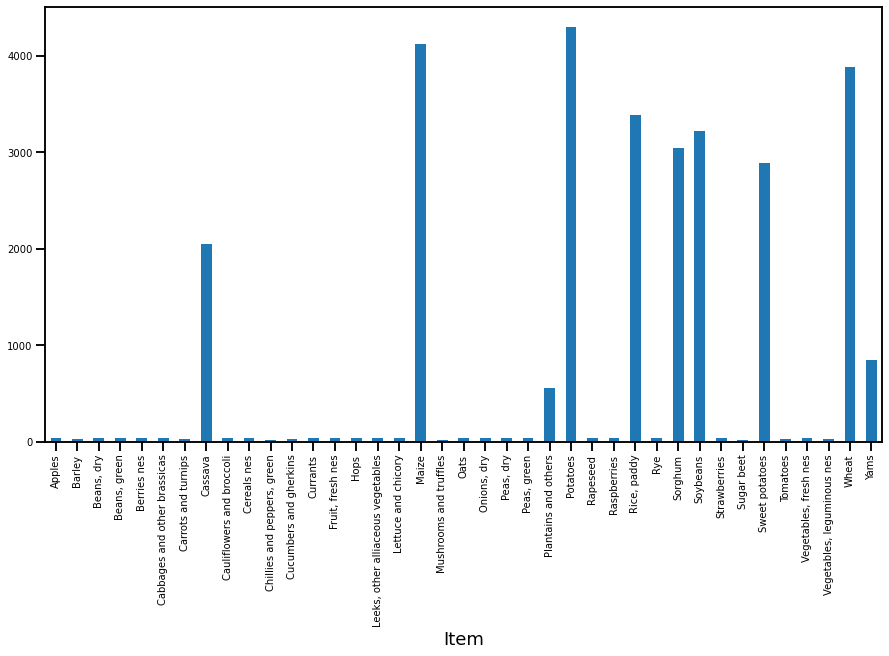

In [41]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
yield_df.groupby("Item")["hg/ha_yield"].agg("count").plot.bar()
plt.show();

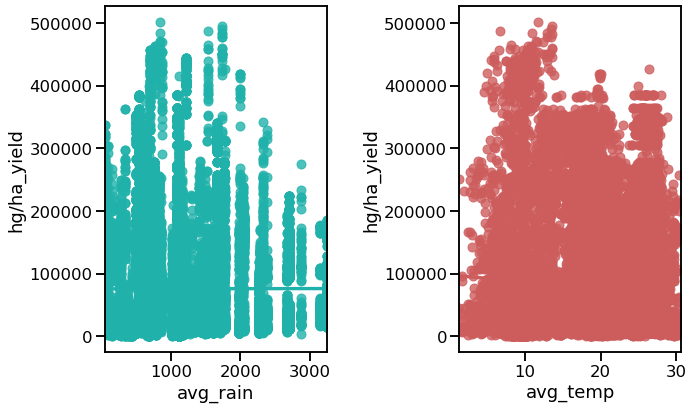

In [42]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(10, 6)
sns.regplot(x="avg_rain", y="hg/ha_yield", data=yield_df,color='lightseagreen', ax=ax1);
sns.regplot(x="avg_temp", y="hg/ha_yield", data=yield_df,color='indianred',ax=ax2);
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.9, top = 0.9, wspace = 0.6, hspace = 0.4);

<AxesSubplot:>

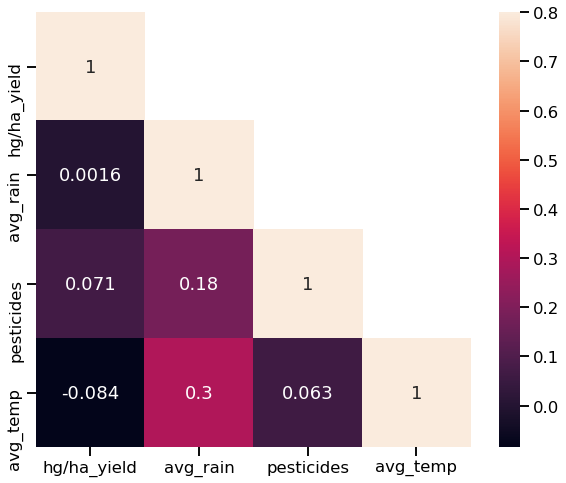

In [43]:
corrMatt = yield_df[["hg/ha_yield","avg_rain","pesticides","avg_temp",]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,8)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

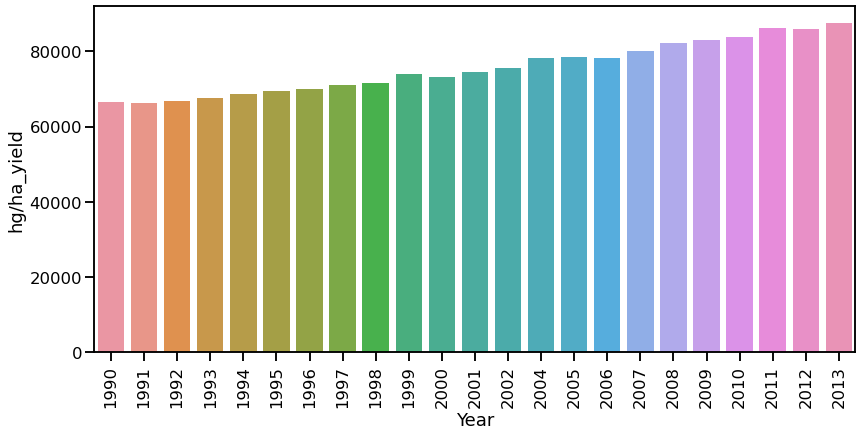

In [44]:
fig = plt.figure(figsize=[30,14])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='Year',y='hg/ha_yield',data=yield_df.groupby('Year')['hg/ha_yield'].mean().reset_index())
plt.xticks(rotation=90);

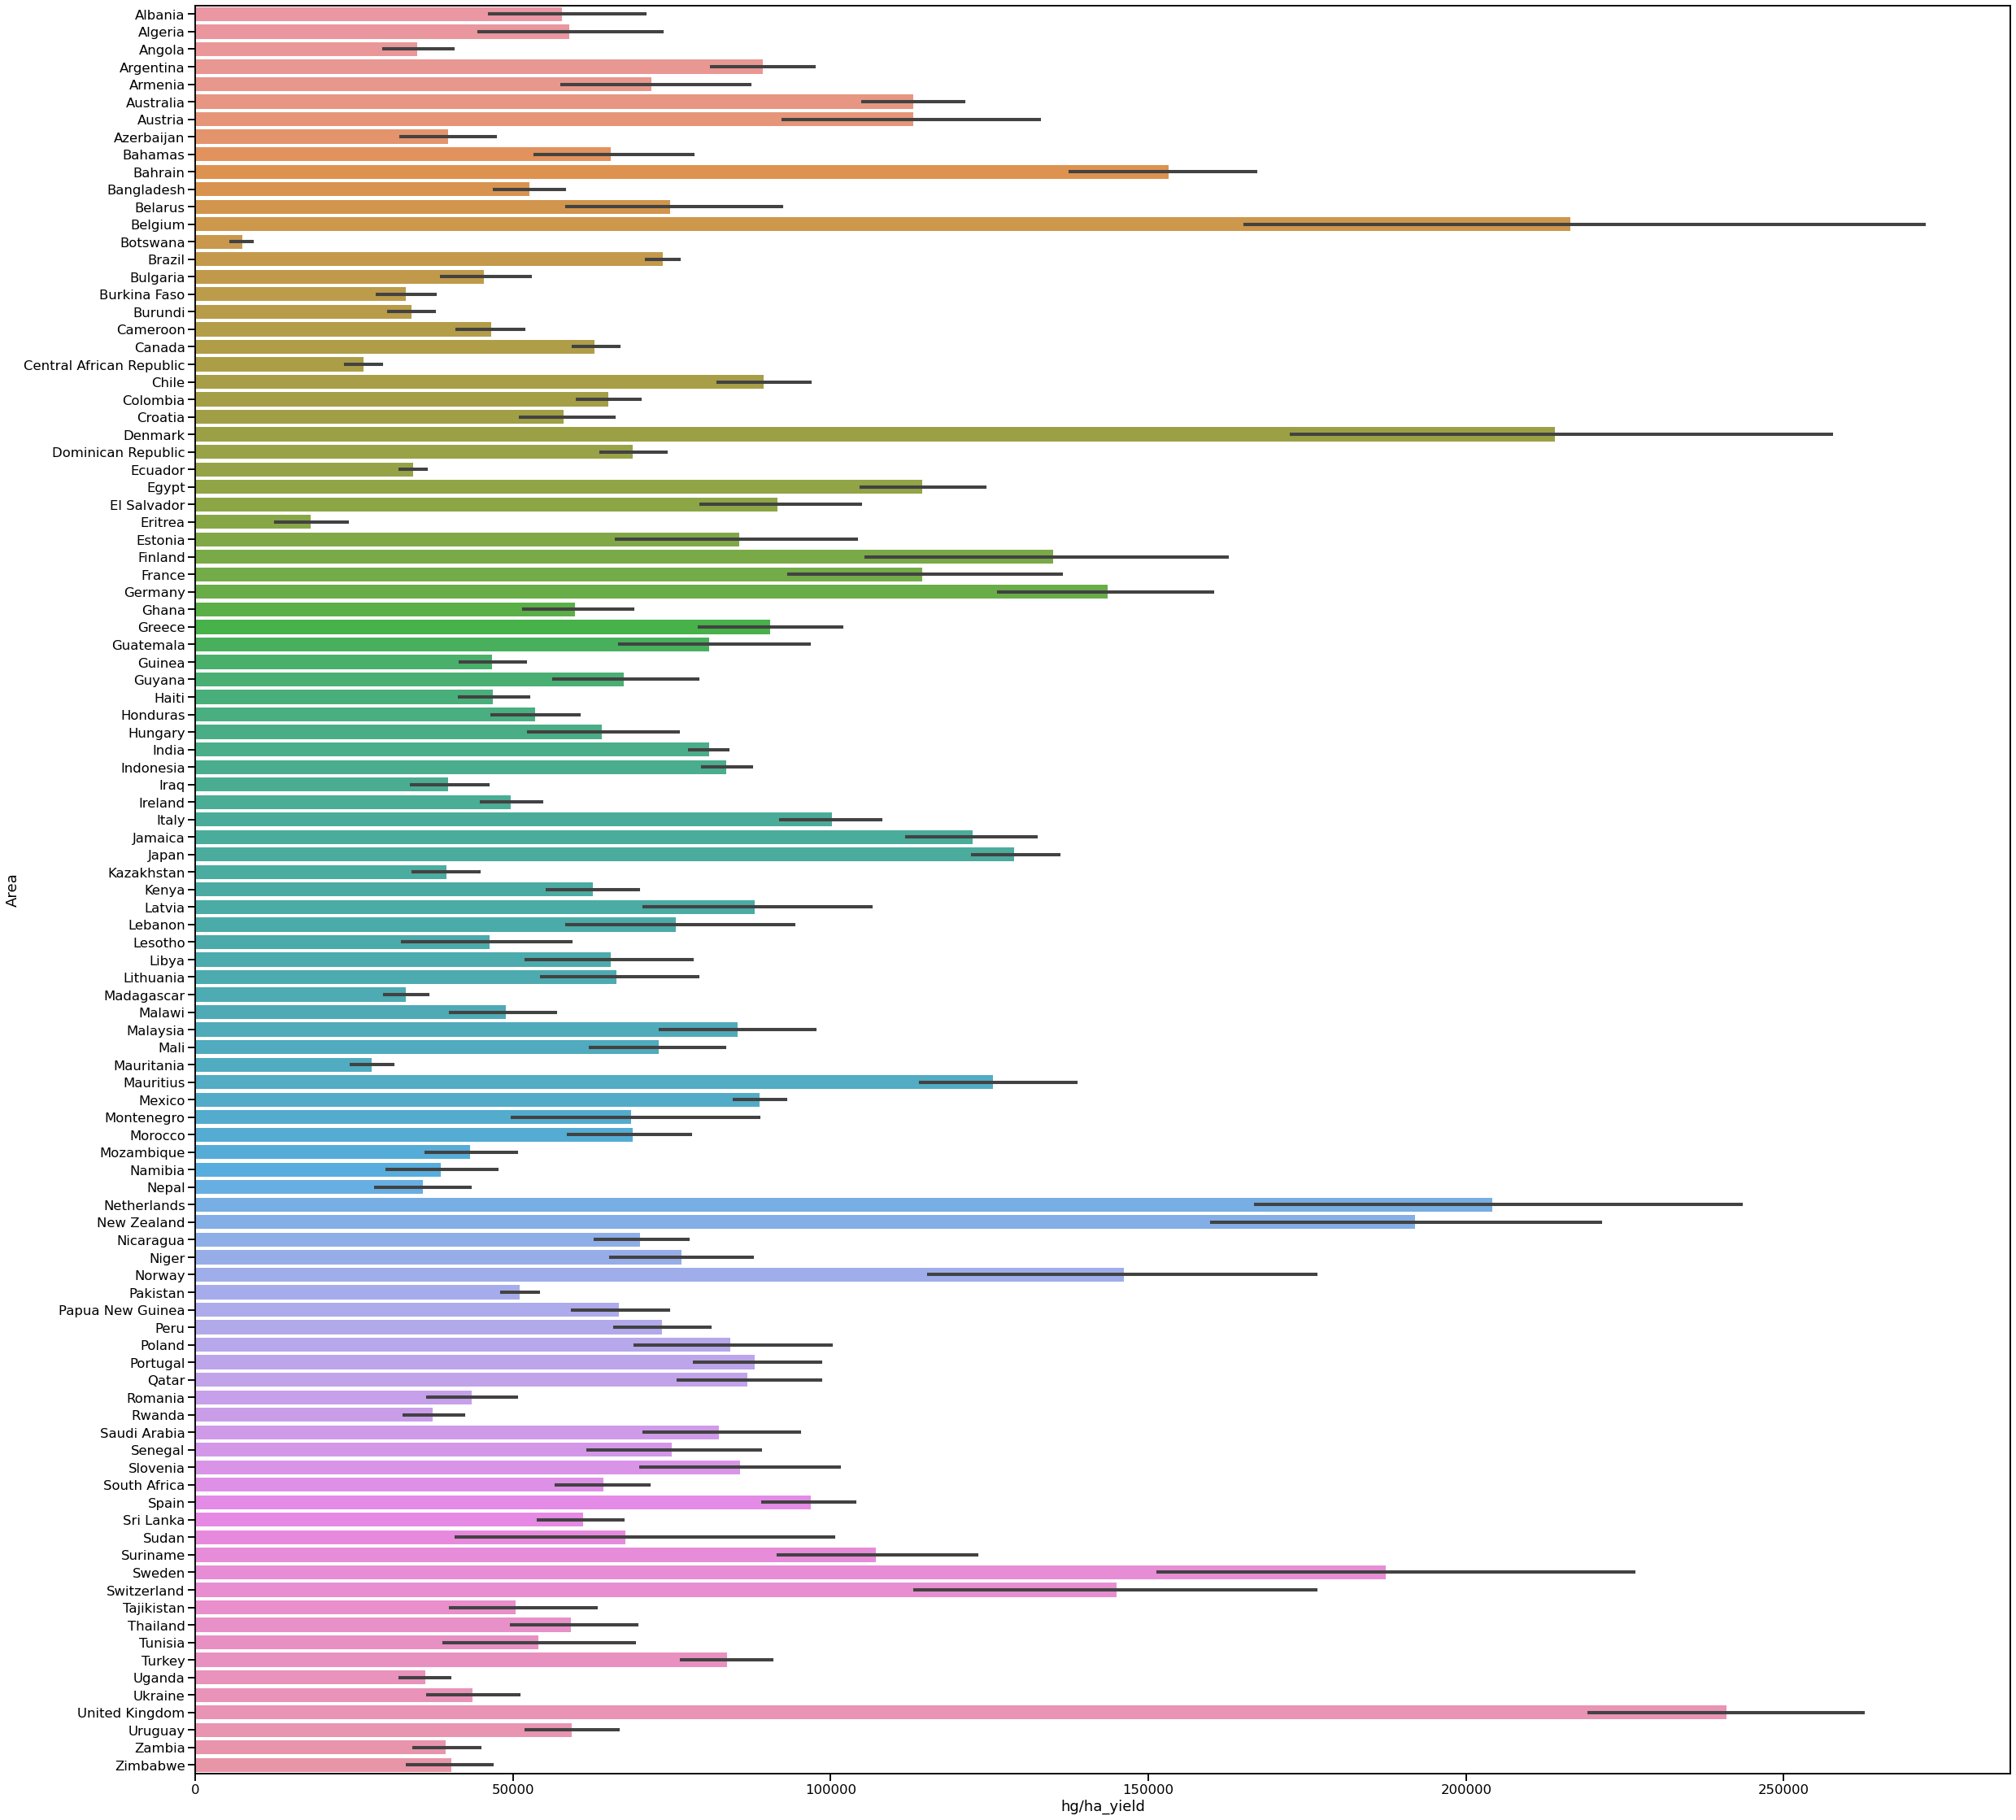

In [45]:
plt.figure(figsize= (40,40))
sns.barplot(x=yield_df['hg/ha_yield'],y= yield_df["Area"], orient='h');

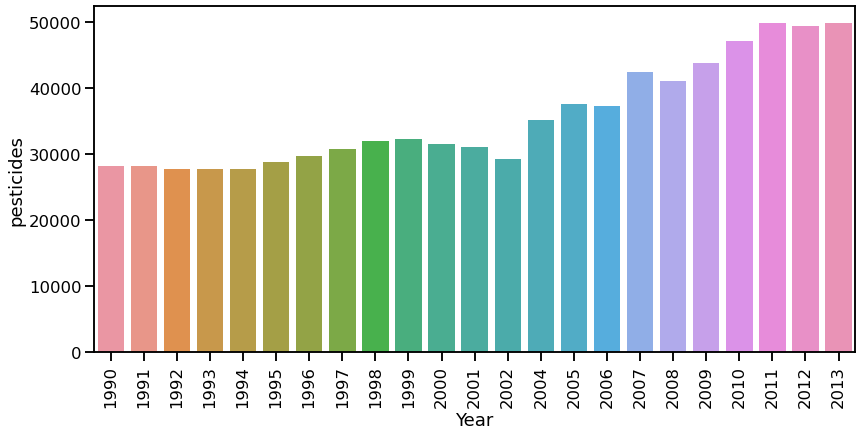

In [46]:
fig = plt.figure(figsize=[30,14])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='Year',y='pesticides',data=yield_df.groupby('Year')['pesticides'].mean().reset_index())
plt.xticks(rotation=90);

In [47]:
india =  yield_df[(yield_df["Area"] == 'India')]
ireland = yield_df[(yield_df["Area"] == 'Ireland')]
italy = yield_df[(yield_df["Area"] == 'Italy')]
germany = yield_df[(yield_df["Area"] == 'Germany')]

In [48]:
india

Area     Item  Year  hg/ha_yield  avg_rain  pesticides  avg_temp
10502  India  Cassava  1990       205381    1083.0     75000.0     25.58
10503  India  Cassava  1990       205381    1083.0     75000.0     26.88
10504  India  Cassava  1990       205381    1083.0     75000.0     25.79
10505  India  Cassava  1990       205381    1083.0     75000.0     24.10
10506  India  Cassava  1990       205381    1083.0     75000.0     25.25
...      ...      ...   ...          ...       ...         ...       ...
14545  India    Wheat  2013        31538    1083.0     45620.0     27.14
14546  India    Wheat  2013        31538    1083.0     45620.0     25.98
14547  India    Wheat  2013        31538    1083.0     45620.0     27.44
14548  India    Wheat  2013        31538    1083.0     45620.0     27.44
14549  India    Wheat  2013        31538    1083.0     45620.0     26.99

[4048 rows x 7 columns]

In [49]:
italy

Area            Item  Year  hg/ha_yield  avg_rain  pesticides  \
16732  Italy           Maize  1990        76375     832.0    100596.4   
16733  Italy           Maize  1990        76375     832.0    100596.4   
16734  Italy        Potatoes  1990       191624     832.0    100596.4   
16735  Italy        Potatoes  1990       191624     832.0    100596.4   
16736  Italy     Rice, paddy  1990        60278     832.0    100596.4   
...      ...             ...   ...          ...       ...         ...   
17049  Italy        Soybeans  2013        33906     832.0     55633.0   
17050  Italy  Sweet potatoes  2013       227753     832.0     55633.0   
17051  Italy  Sweet potatoes  2013       227753     832.0     55633.0   
17052  Italy           Wheat  2013        38441     832.0     55633.0   
17053  Italy           Wheat  2013        38441     832.0     55633.0   

       avg_temp  
16732      7.97  
16733     12.83  
16734      7.97  
16735     12.83  
16736      7.97  
...         ...  
17049     13.60  
17050      8.04  
17051     13.60  
17052      8.04  
17053     13.60  

[322 rows x 7 columns]

In [50]:
ireland

Area                        Item  Year  hg/ha_yield  avg_rain  \
15654  Ireland                    Potatoes  1990       248971    1118.0   
15655  Ireland                       Wheat  1990        85307    1118.0   
15656  Ireland                    Potatoes  1991       278537    1118.0   
15657  Ireland                       Wheat  1991        78646    1118.0   
15658  Ireland                    Potatoes  1992       288688    1118.0   
...        ...                         ...   ...          ...       ...   
16727  Ireland       Vegetables, fresh nes  2013        36542    1118.0   
16728  Ireland  Vegetables, leguminous nes  2013            0    1118.0   
16729  Ireland  Vegetables, leguminous nes  2013            1    1118.0   
16730  Ireland                       Wheat  2013        60600    1118.0   
16731  Ireland                       Wheat  2013        89983    1118.0   

       pesticides  avg_temp  
15654      2014.0      9.59  
15655      2014.0      9.59  
15656      2014.0      9.07  
15657      2014.0      9.07  
15658      2014.0      9.07  
...           ...       ...  
16727      2950.8      9.28  
16728      2950.8      9.28  
16729      2950.8      9.28  
16730      2950.8      9.28  
16731      2950.8      9.28  

[1078 rows x 7 columns]

In [51]:
germany

Area      Item  Year  hg/ha_yield  avg_rain  pesticides  avg_temp
8891  Germany     Maize  1990        67762     700.0     31289.0     10.71
8892  Germany     Maize  1990        67762     700.0     31289.0     10.08
8893  Germany     Maize  1990        67762     700.0     31289.0      5.92
8894  Germany  Potatoes  1990       257764     700.0     31289.0     10.71
8895  Germany  Potatoes  1990       257764     700.0     31289.0     10.08
...       ...       ...   ...          ...       ...         ...       ...
9156  Germany  Soybeans  2013        20000     700.0     43756.1      9.17
9157  Germany  Soybeans  2013        20000     700.0     43756.1      6.00
9158  Germany     Wheat  2013        79979     700.0     43756.1     10.12
9159  Germany     Wheat  2013        79979     700.0     43756.1      9.17
9160  Germany     Wheat  2013        79979     700.0     43756.1      6.00

[270 rows x 7 columns]

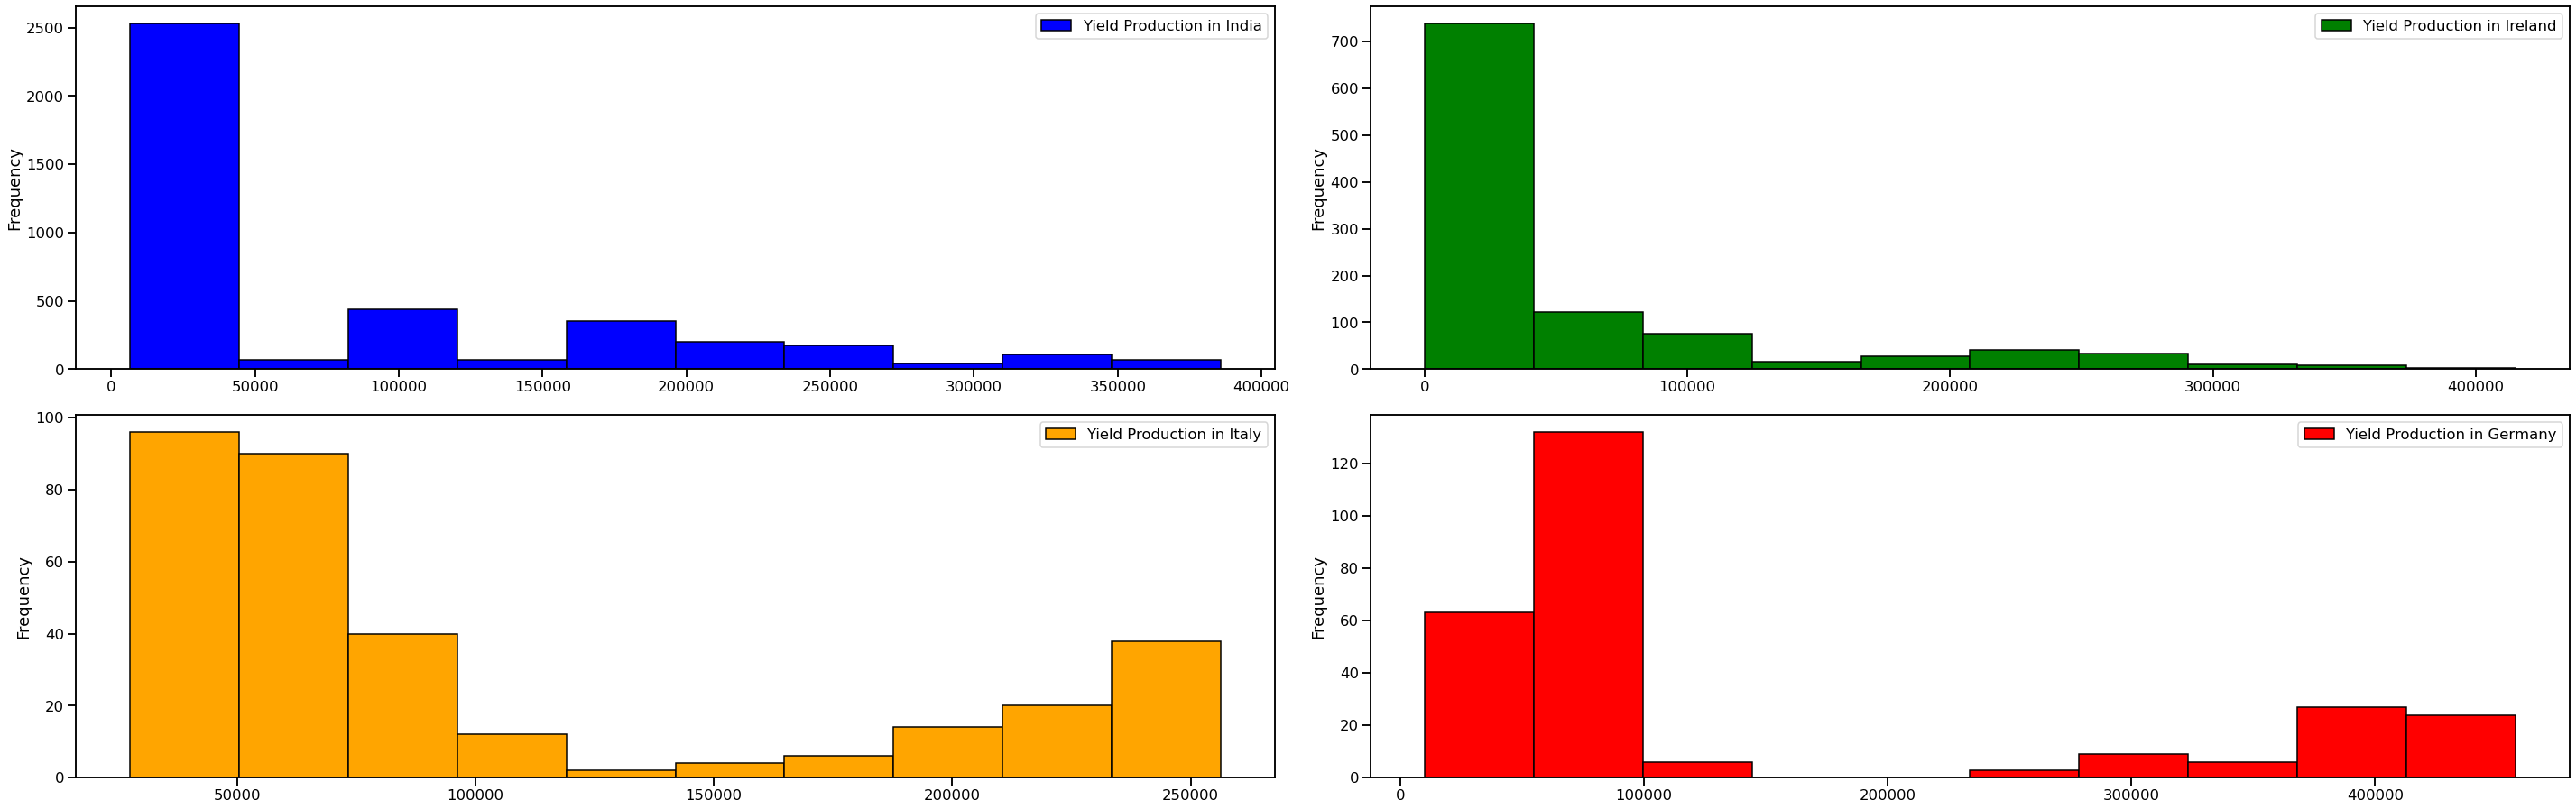

In [52]:
plt.figure(figsize=(40,25))
plt.subplot(421)
india['hg/ha_yield'].plot.hist(bins=10, color='blue', label='Yield Production in India', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)
ireland['hg/ha_yield'].plot.hist(bins=10, color='green', label='Yield Production in Ireland', edgecolor='black')
plt.legend(loc='best')
plt.subplot(423)
italy['hg/ha_yield'].plot.hist(bins=10, color='orange', label='Yield Production in Italy', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)
germany['hg/ha_yield'].plot.hist(bins=10, color='red', label='Yield Production in Germany', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

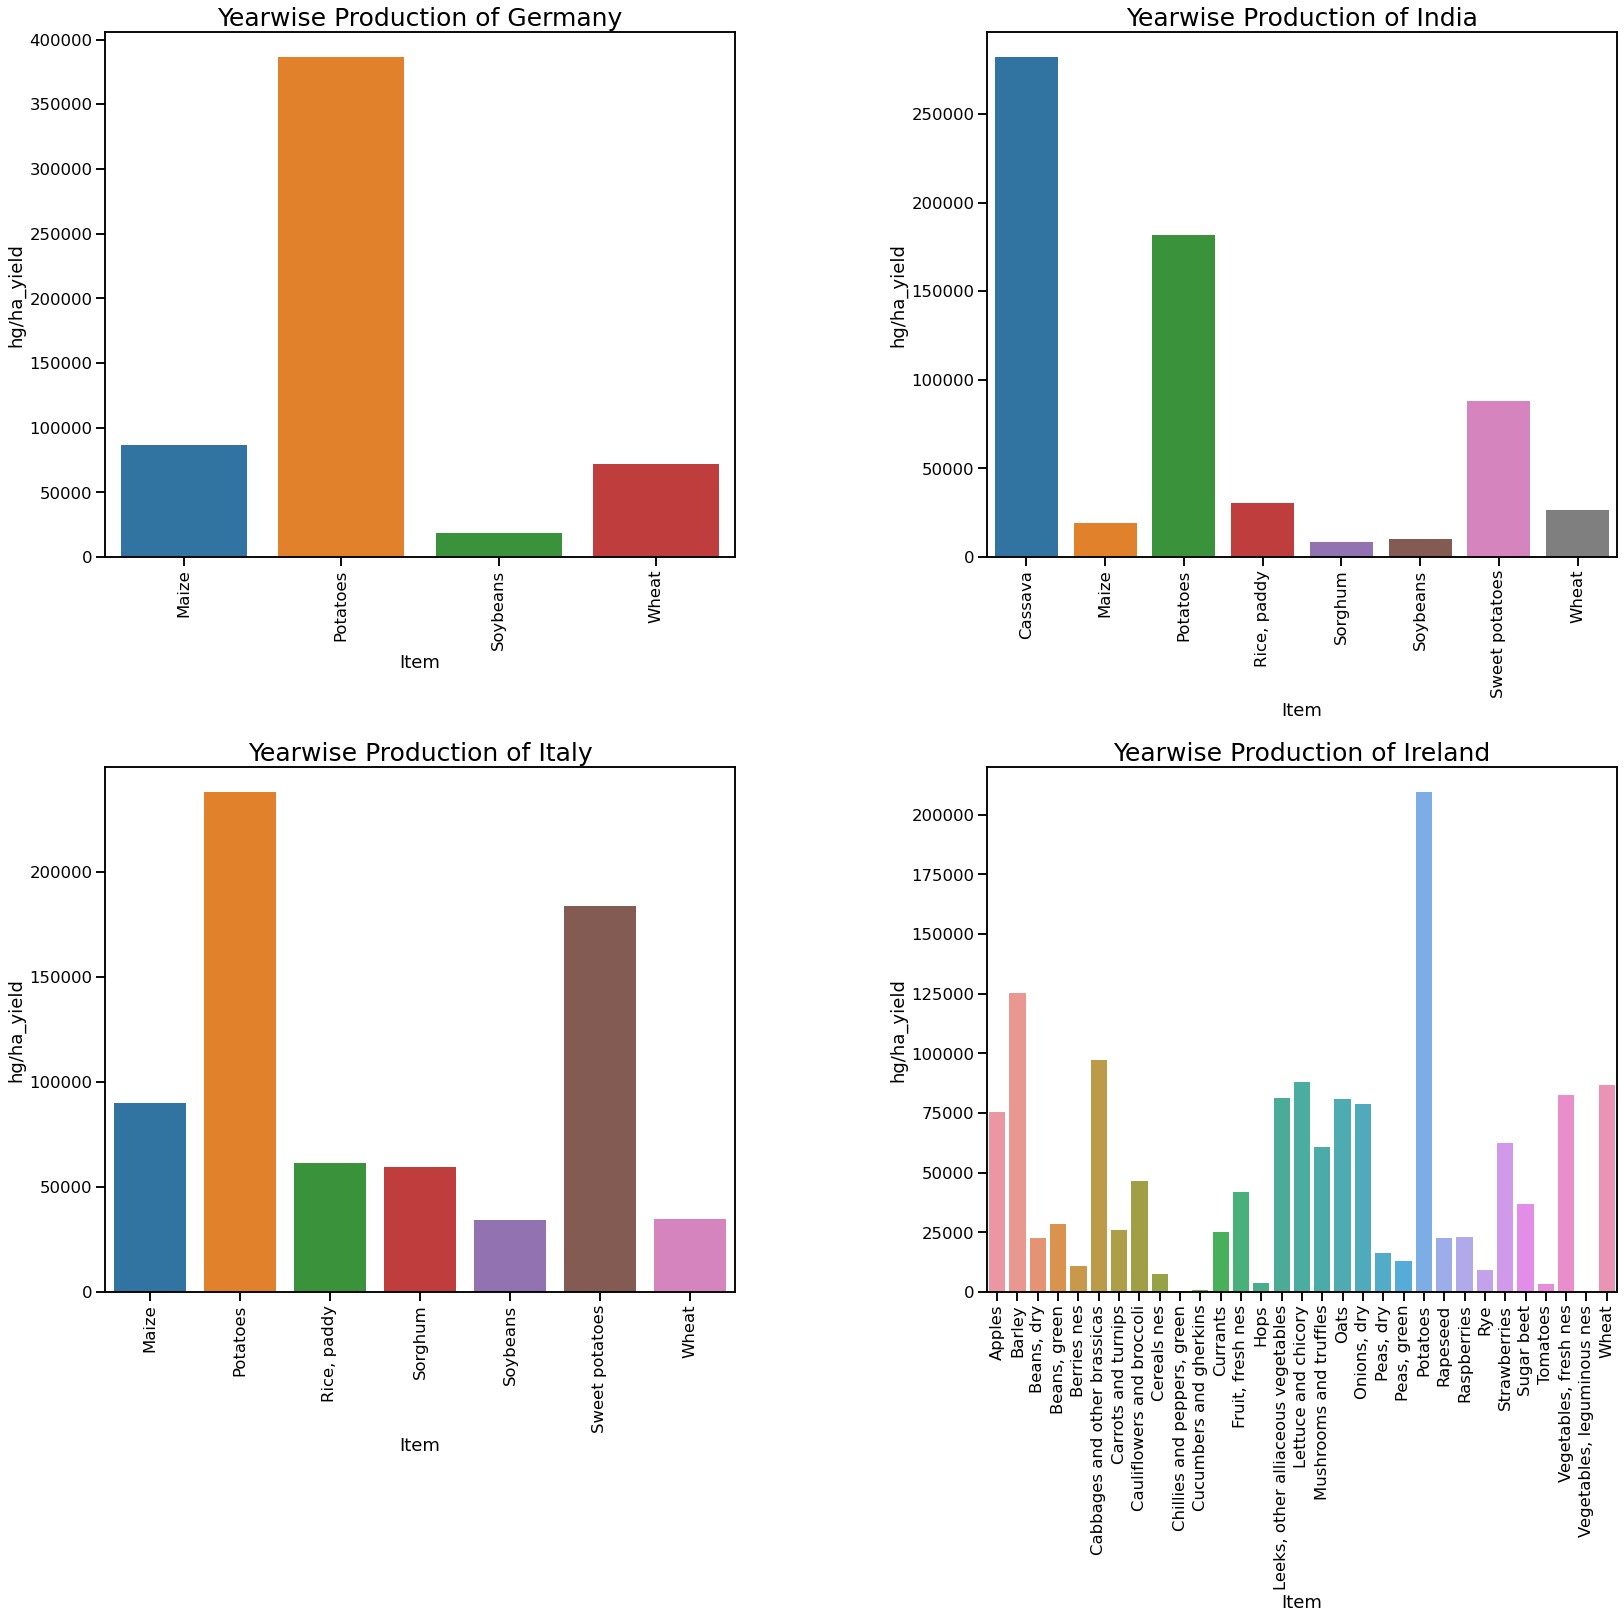

In [53]:
fig = plt.figure(figsize=[30,25])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='Item',y='hg/ha_yield',data=germany.groupby('Item')['hg/ha_yield'].mean().reset_index())
plt.xticks(rotation = 90);
plt.title("Yearwise Production of Germany", fontsize = "25");

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='Item',y='hg/ha_yield',data=india.groupby('Item')['hg/ha_yield'].mean().reset_index())
plt.xticks(rotation = 90);
plt.title("Yearwise Production of India", fontsize = "25");

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='Item',y='hg/ha_yield',data=italy.groupby('Item')['hg/ha_yield'].mean().reset_index())
plt.xticks(rotation = 90);
plt.title("Yearwise Production of Italy", fontsize = "25");

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='Item',y='hg/ha_yield',data=ireland.groupby('Item')['hg/ha_yield'].mean().reset_index())
plt.xticks(rotation = 90);
plt.title("Yearwise Production of Ireland", fontsize = "25");
plt.subplots_adjust(left = 0.1, bottom = 0.1, right = 0.8, top = 0.8, wspace = 0.4, hspace = 0.4);

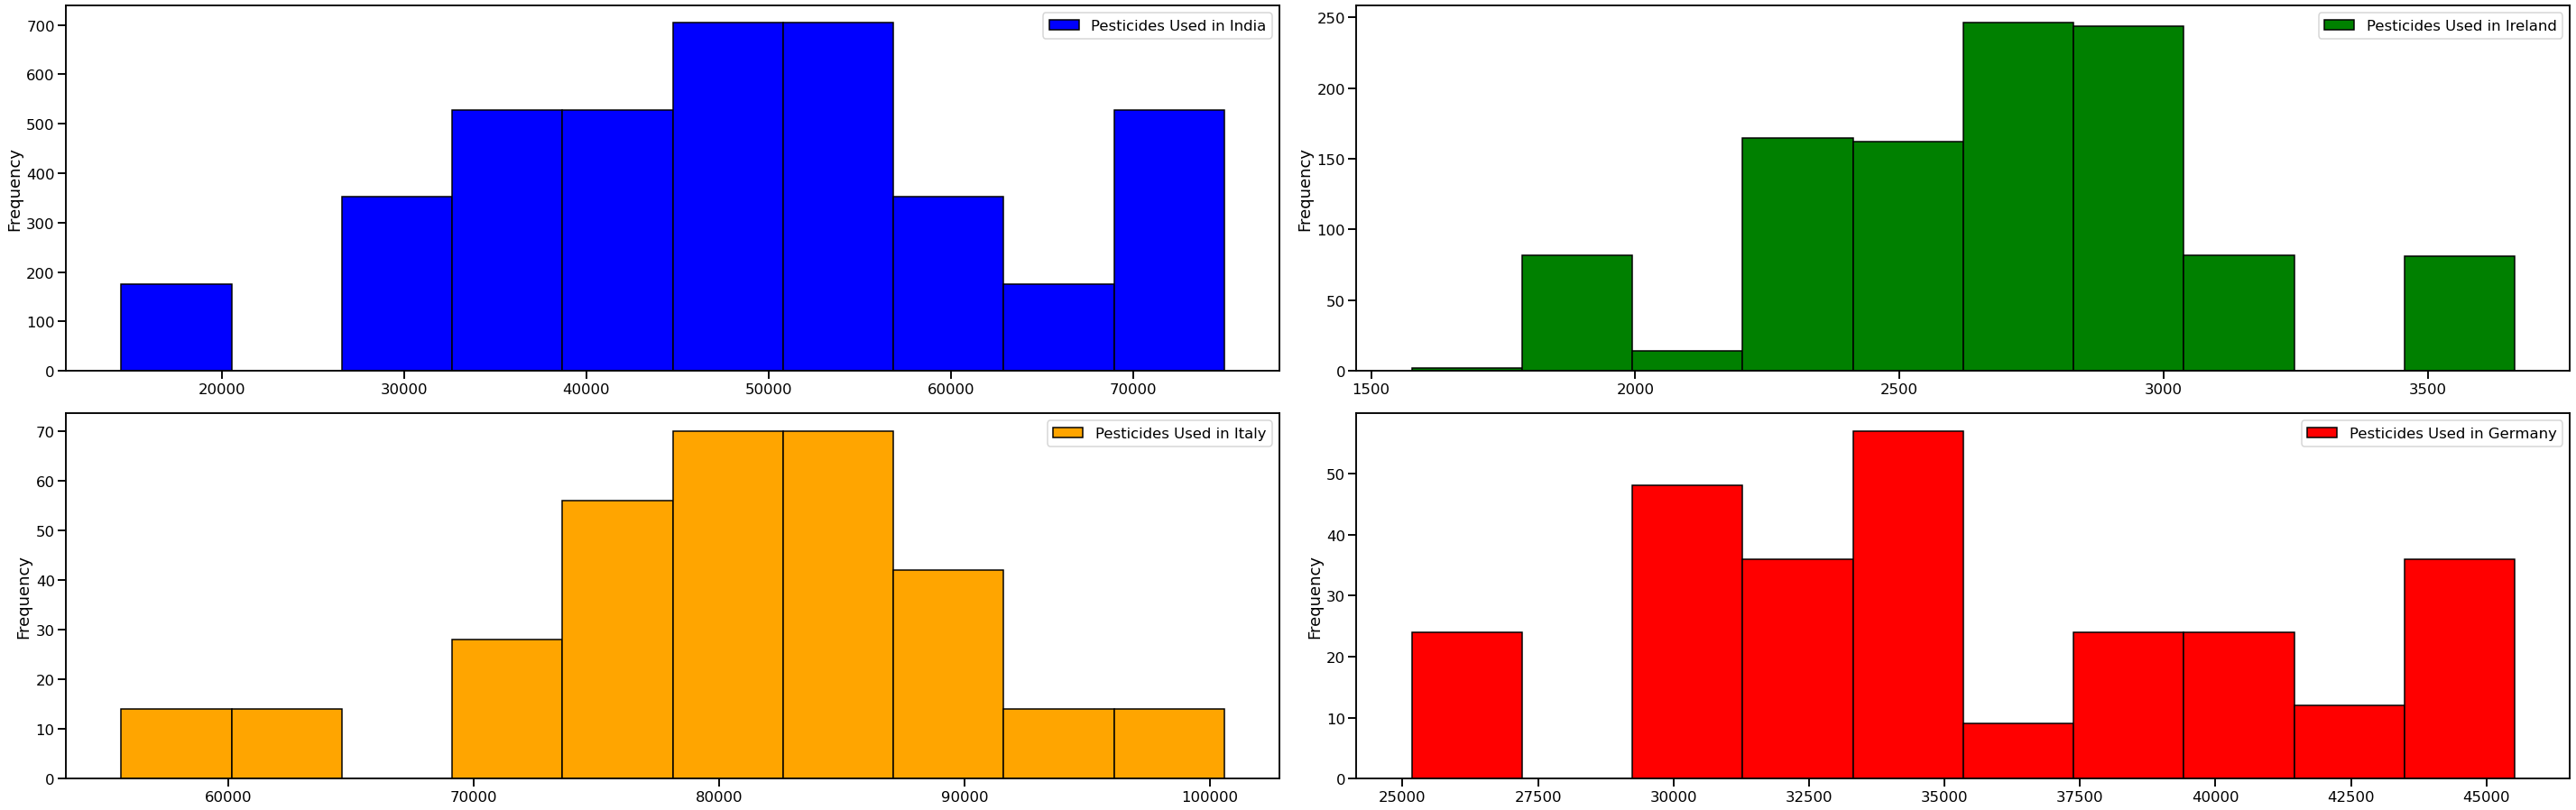

In [54]:
plt.figure(figsize=(40,25))
plt.subplot(421)
india['pesticides'].plot.hist(bins=10, color='blue', label='Pesticides Used in India', edgecolor='black')
plt.legend(loc='best')
plt.subplot(422)
ireland['pesticides'].plot.hist(bins=10, color='green', label='Pesticides Used in Ireland', edgecolor='black')
plt.legend(loc='best')
plt.subplot(423)
italy['pesticides'].plot.hist(bins=10, color='orange', label='Pesticides Used in Italy', edgecolor='black')
plt.legend(loc='best')
plt.subplot(424)
germany['pesticides'].plot.hist(bins=10, color='red', label='Pesticides Used in Germany', edgecolor='black')
plt.legend(loc='best')
plt.tight_layout();

In [55]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

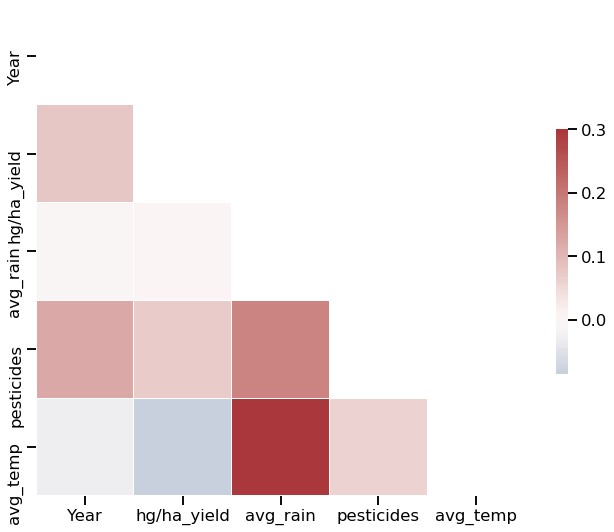

In [56]:
correlation_data=yield_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
yield_df_onehot = pd.get_dummies(yield_df, columns=['Area',"Item"], prefix = ['Country',"Item"])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield']
label=yield_df['hg/ha_yield']
features.head()

Year  avg_rain  pesticides  avg_temp  Country_Albania  Country_Algeria  \
0  1990    1485.0       121.0     16.37                1                0   
1  1990    1485.0       121.0     16.37                1                0   
2  1990    1485.0       121.0     16.37                1                0   
3  1990    1485.0       121.0     16.37                1                0   
4  1990    1485.0       121.0     16.37                1                0   

   Country_Angola  Country_Argentina  Country_Armenia  Country_Australia  ...  \
0               0                  0                0                  0  ...   
1               0                  0                0                  0  ...   
2               0                  0                0                  0  ...   
3               0                  0                0                  0  ...   
4               0                  0                0                  0  ...   

   Item_Sorghum  Item_Soybeans  Item_Strawberries  Item_Sugar beet  \
0             0              0                  0                0   
1             0              0                  0                0   
2             0              0                  0                0   
3             1              0                  0                0   
4             0              1                  0                0   

   Item_Sweet potatoes  Item_Tomatoes  Item_Vegetables, fresh nes  \
0                    0              0                           0   
1                    0              0                           0   
2                    0              0                           0   
3                    0              0                           0   
4                    0              0                           0   

   Item_Vegetables, leguminous nes  Item_Wheat  Item_Yams  
0                                0           0          0  
1                                0           0          0  
2                                0           0          0  
3                                0           0          0  
4                                0           0          0  

[5 rows x 144 columns]

In [59]:
features = features.drop(['Year'], axis=1)

In [60]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29274 entries, 0 to 29273
Columns: 143 entries, avg_rain to Item_Yams
dtypes: float64(3), uint8(140)
memory usage: 6.1 MB


In [61]:
features.head()

avg_rain  pesticides  avg_temp  Country_Albania  Country_Algeria  \
0    1485.0       121.0     16.37                1                0   
1    1485.0       121.0     16.37                1                0   
2    1485.0       121.0     16.37                1                0   
3    1485.0       121.0     16.37                1                0   
4    1485.0       121.0     16.37                1                0   

   Country_Angola  Country_Argentina  Country_Armenia  Country_Australia  \
0               0                  0                0                  0   
1               0                  0                0                  0   
2               0                  0                0                  0   
3               0                  0                0                  0   
4               0                  0                0                  0   

   Country_Austria  ...  Item_Sorghum  Item_Soybeans  Item_Strawberries  \
0                0  ...             0              0                  0   
1                0  ...             0              0                  0   
2                0  ...             0              0                  0   
3                0  ...             1              0                  0   
4                0  ...             0              1                  0   

   Item_Sugar beet  Item_Sweet potatoes  Item_Tomatoes  \
0                0                    0              0   
1                0                    0              0   
2                0                    0              0   
3                0                    0              0   
4                0                    0              0   

   Item_Vegetables, fresh nes  Item_Vegetables, leguminous nes  Item_Wheat  \
0                           0                                0           0   
1                           0                                0           0   
2                           0                                0           0   
3                           0                                0           0   
4                           0                                0           0   

   Item_Yams  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 143 columns]

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features)

In [63]:
features

array([[4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.49670743e-01, 3.28894097e-04, 5.13458262e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90028222e-01, 6.93361288e-03, 6.28960818e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [64]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.3, random_state=42)

In [65]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [67]:
model_train=list(map(compare_models,models)) 

In [68]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.8670280517602785]
['RandomForestRegressor', 0.6723732965558203]
['SVR', -0.18115119405679758]
['DecisionTreeRegressor', 0.9014697853776534]


In [69]:
yield_df_onehot = yield_df_onehot.drop(['Year'], axis=1)

In [70]:
yield_df_onehot.head()

hg/ha_yield  avg_rain  pesticides  avg_temp  Country_Albania  \
0        36613    1485.0       121.0     16.37                1   
1        66667    1485.0       121.0     16.37                1   
2        23333    1485.0       121.0     16.37                1   
3        12500    1485.0       121.0     16.37                1   
4         7000    1485.0       121.0     16.37                1   

   Country_Algeria  Country_Angola  Country_Argentina  Country_Armenia  \
0                0               0                  0                0   
1                0               0                  0                0   
2                0               0                  0                0   
3                0               0                  0                0   
4                0               0                  0                0   

   Country_Australia  ...  Item_Sorghum  Item_Soybeans  Item_Strawberries  \
0                  0  ...             0              0                  0   
1                  0  ...             0              0                  0   
2                  0  ...             0              0                  0   
3                  0  ...             1              0                  0   
4                  0  ...             0              1                  0   

   Item_Sugar beet  Item_Sweet potatoes  Item_Tomatoes  \
0                0                    0              0   
1                0                    0              0   
2                0                    0              0   
3                0                    0              0   
4                0                    0              0   

   Item_Vegetables, fresh nes  Item_Vegetables, leguminous nes  Item_Wheat  \
0                           0                                0           0   
1                           0                                0           0   
2                           0                                0           0   
3                           0                                0           0   
4                           0                                0           0   

   Item_Yams  
0          0  
1          0  
2          0  
3          0  
4          0  

[5 rows x 144 columns]

In [71]:
test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'hg/ha_yield'].columns) 

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe

cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

In [72]:
test_df.head()

avg_rain  pesticides  avg_temp  Country_Albania  Country_Algeria  \
0  0.169332    0.221826  0.539693              0.0              0.0   
1  0.138915    0.024209  0.765928              0.0              0.0   
2  0.627156    0.002473  0.893015              0.0              0.0   
3  0.732518    0.001090  0.890290              0.0              0.0   
4  0.012857    0.000106  0.907325              0.0              0.0   

   Country_Angola  Country_Argentina  Country_Armenia  Country_Australia  \
0             0.0                1.0              0.0                0.0   
1             0.0                0.0              0.0                0.0   
2             0.0                0.0              0.0                0.0   
3             0.0                0.0              0.0                0.0   
4             0.0                0.0              0.0                0.0   

   Country_Austria  ...  Item_Sorghum  Item_Soybeans  Item_Strawberries  \
0              0.0  ...           0.0            1.0                0.0   
1              0.0  ...           0.0            0.0                0.0   
2              0.0  ...           0.0            0.0                0.0   
3              0.0  ...           0.0            0.0                0.0   
4              0.0  ...           0.0            0.0                0.0   

   Item_Sugar beet  Item_Sweet potatoes  Item_Tomatoes  \
0              0.0                  0.0            0.0   
1              0.0                  0.0            0.0   
2              0.0                  0.0            0.0   
3              0.0                  1.0            0.0   
4              0.0                  0.0            0.0   

   Item_Vegetables, fresh nes  Item_Vegetables, leguminous nes  Item_Wheat  \
0                         0.0                              0.0         0.0   
1                         0.0                              0.0         1.0   
2                         0.0                              0.0         0.0   
3                         0.0                              0.0         0.0   
4                         0.0                              0.0         0.0   

   Item_Yams  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  

[5 rows x 143 columns]

In [73]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

avg_rain  pesticides  avg_temp
0  0.169332    0.221826  0.539693
1  0.138915    0.024209  0.765928
2  0.627156    0.002473  0.893015
3  0.732518    0.001090  0.890290
4  0.012857    0.000106  0.907325

In [74]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

avg_rain  pesticides  avg_temp     Country            Item
0  0.169332    0.221826  0.539693   Argentina        Soybeans
1  0.138915    0.024209  0.765928    Pakistan           Wheat
2  0.627156    0.002473  0.893015     Jamaica     Rice, paddy
3  0.732518    0.001090  0.890290      Guyana  Sweet potatoes
4  0.012857    0.000106  0.907325  Mauritania     Rice, paddy

In [75]:
clf=DecisionTreeRegressor()
model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

Item
Apples                                -0.350034
Barley                                -2.360154
Beans, dry                            -3.134552
Beans, green                          -1.829586
Berries nes                           -2.644316
Cabbages and other brassicas          -2.753459
Carrots and turnips                   -2.648657
Cassava                                0.933825
Cauliflowers and broccoli             -1.265634
Cereals nes                           -1.491386
Chillies and peppers, green          -14.694444
Cucumbers and gherkins                -2.784075
Currants                              -2.344098
Fruit, fresh nes                      -1.163691
Hops                                  -3.394751
Leeks, other alliaceous vegetables    -1.933728
Lettuce and chicory                   -1.632977
Maize                                  0.891016
Mushrooms and truffles                -3.258034
Oats                                  -0.993190
Onions, dry                        

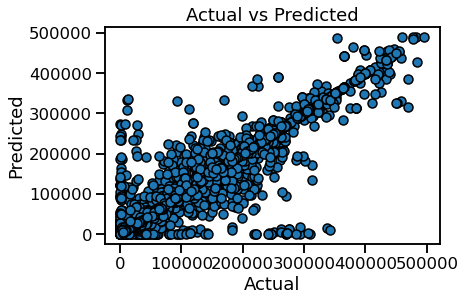

In [76]:
fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show();

In [77]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

Item
Apples                                -5.750172
Barley                                     -inf
Beans, dry                            -9.749836
Beans, green                         -24.466270
Berries nes                           26.510215
Cabbages and other brassicas          -5.483248
Carrots and turnips                        -inf
Cassava                                0.932956
Cauliflowers and broccoli            -19.390710
Cereals nes                          -11.456932
Chillies and peppers, green            3.242063
Cucumbers and gherkins               -17.920374
Currants                              -4.776169
Fruit, fresh nes                      -3.327383
Hops                                   8.324585
Leeks, other alliaceous vegetables    21.536098
Lettuce and chicory                   -6.898930
Maize                                  0.890312
Mushrooms and truffles                 1.608291
Oats                                       -inf
Onions, dry                        

In [78]:
varimp= {'imp':model.feature_importances_,'names':yield_df_onehot.columns[yield_df_onehot.columns!="hg/ha_yield"]}

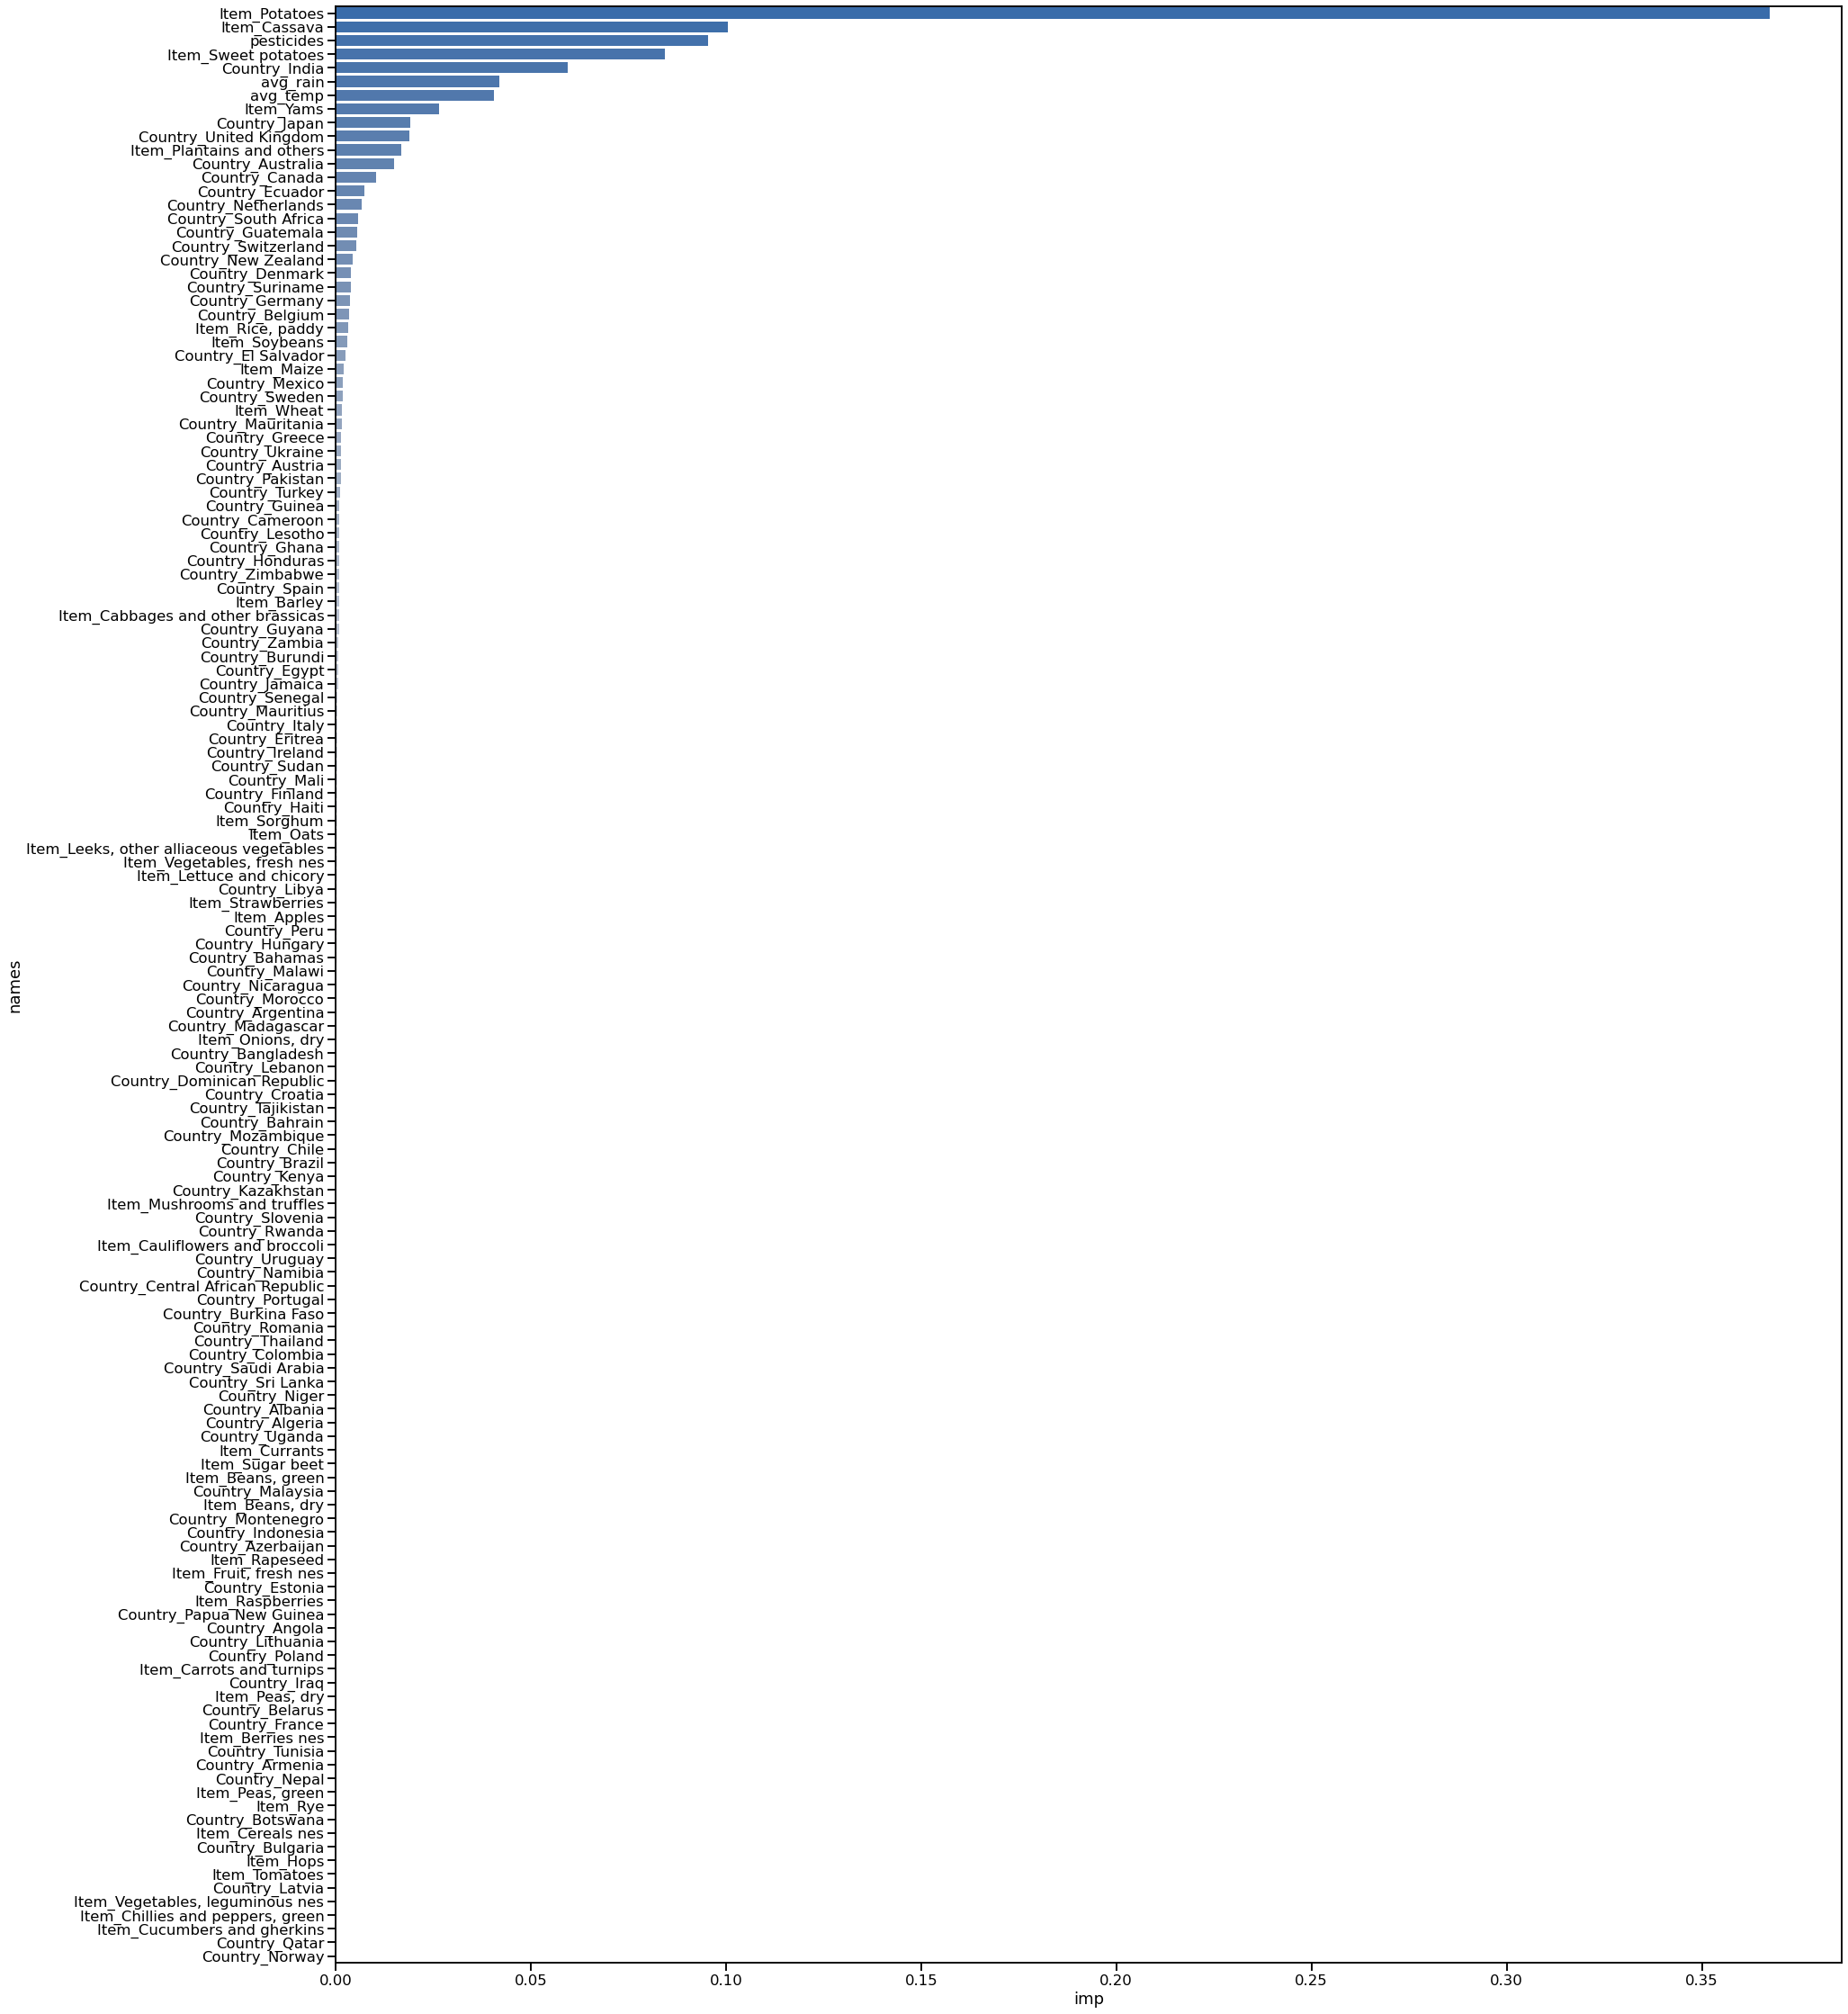

In [79]:
a4_dims = (30,40)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

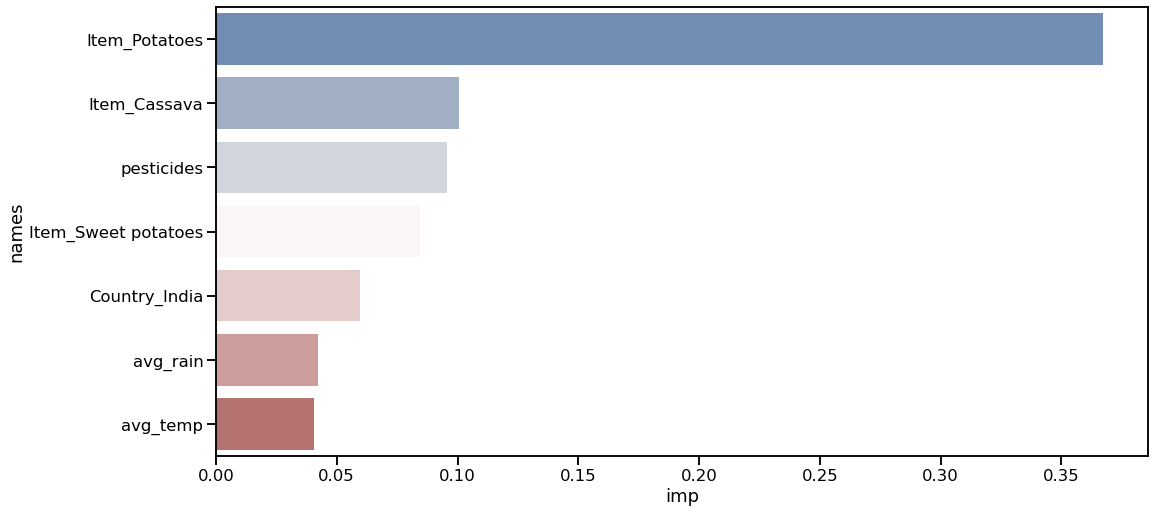

In [80]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["imp"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'imp')
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

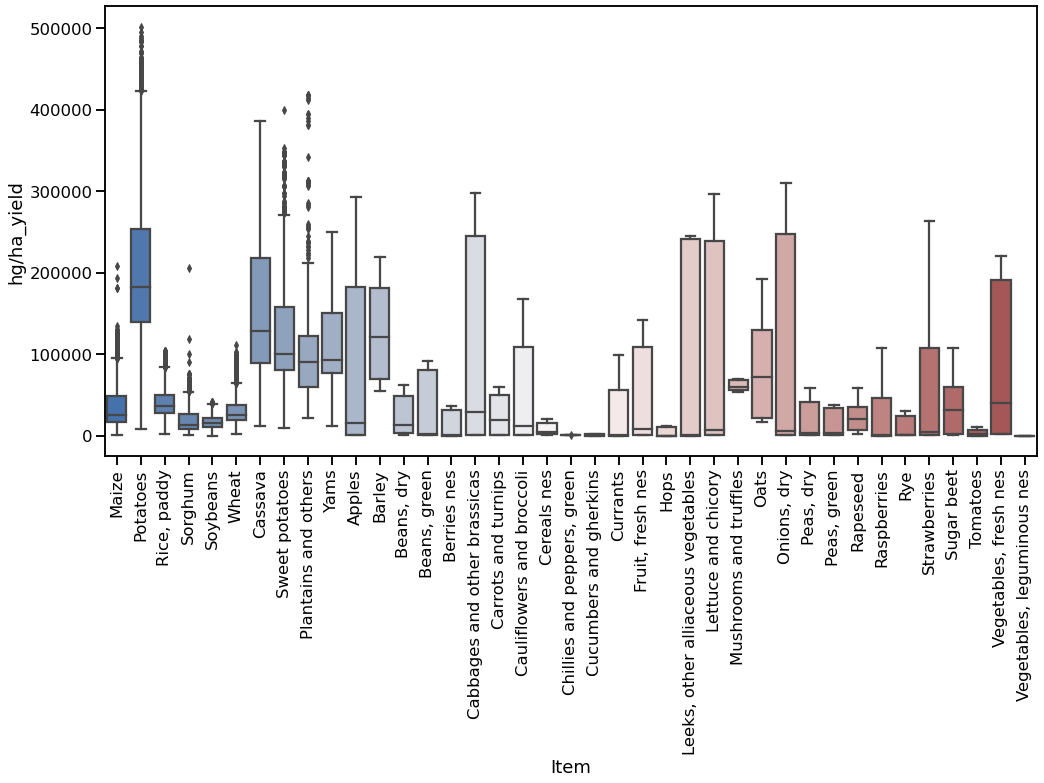

In [81]:
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);
plt.xticks(rotation=90);

In [82]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.stats import norm
import statistics
import random

In [83]:
mean = yield_df['hg/ha_yield'].mean()
sum = yield_df['hg/ha_yield'].sum()
max = yield_df['hg/ha_yield'].max()
min = yield_df['hg/ha_yield'].min()
count = yield_df['hg/ha_yield'].count()
median = yield_df['hg/ha_yield'].median() 
mode = statistics.mode(yield_df['hg/ha_yield'])
std = yield_df['hg/ha_yield'].std() 
var1 = yield_df['hg/ha_yield'].var()  
var2 = yield_df['hg/ha_yield'].var(ddof=1)
mad = yield_df['hg/ha_yield'].mad()

       
# print block 1
print ('Mean of count: ' + str(mean))
print ('Sum of count: ' + str(sum))
print ('Max of count: ' + str(max))
print ('Min of count: ' + str(min))
print ('Total Count of count : ' + str(count))
print ('Median of count: ' + str(median))
print ('Mode of count: ' + str(mode))
print ('Std of count: ' + str(std))
print ('Var of count: ' + str(var1))
print ('Variance freedom=1:' + str(var2))
print ('Mean absolute deviation:' + str(mad))

Mean of count: 75854.80969460955
Sum of count: 2220573699
Max of count: 501412
Min of count: 0
Total Count of count : 29274
Median of count: 37320.0
Mode of count: 10000
Std of count: 84763.4877453562
Var of count: 7184848854.75715
Variance freedom=1:7184848854.75715
Mean absolute deviation:64049.46080067998


In [84]:
t_india = india.filter(['hg/ha_yield'])
t_ireland = ireland.filter(['hg/ha_yield'])
t_italy = italy.filter(['hg/ha_yield'])
t_germany = germany.filter(['hg/ha_yield'])

In [85]:
df_max_scaled1 = t_india.copy()
  
# apply normalization techniques on Column 1
column = 'hg/ha_yield'
df_max_scaled1[column] = df_max_scaled1[column] /df_max_scaled1[column].abs().max()
  
# view normalized data
display(df_max_scaled1)

hg/ha_yield
10502     0.532326
10503     0.532326
10504     0.532326
10505     0.532326
10506     0.532326
...            ...
14545     0.081743
14546     0.081743
14547     0.081743
14548     0.081743
14549     0.081743

[4048 rows x 1 columns]

In [86]:
df_max_scaled2 = t_ireland.copy()
  
# apply normalization techniques on Column 1
column = 'hg/ha_yield'
df_max_scaled2[column] = df_max_scaled2[column] /df_max_scaled2[column].abs().max()
  
# view normalized data
display(df_max_scaled2)

hg/ha_yield
15654     0.599658
15655     0.205466
15656     0.670870
15657     0.189423
15658     0.695319
...            ...
16727     0.088013
16728     0.000000
16729     0.000002
16730     0.145958
16731     0.216728

[1078 rows x 1 columns]

In [87]:
df_max_scaled3 = t_italy.copy()
  
# apply normalization techniques on Column 1
column = 'hg/ha_yield'
df_max_scaled3[column] = df_max_scaled3[column] /df_max_scaled3[column].abs().max()
  
# view normalized data
display(df_max_scaled3)

hg/ha_yield
16732     0.297986
16733     0.297986
16734     0.747643
16735     0.747643
16736     0.235182
...            ...
17049     0.132288
17050     0.888605
17051     0.888605
17052     0.149982
17053     0.149982

[322 rows x 1 columns]

In [88]:
import scipy.stats as stats

data_group1 = df_max_scaled1
data_group2 = df_max_scaled2

t_test = stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)
t_test
#Two sample t-test has the following hypothesis:
#H0 => µ1 = µ2 (population mean of dataset1 is equal to dataset2)
#HA => µ1 ≠µ2 (population mean of dataset1 is different from dataset2)
#Here, since the p-value (3.61) is greater than alpha = 0.05 so we cannot reject the null hypothesis of the test.We do not have sufficient evidence to say that the mean production of ireland and india is different.

Ttest_indResult(statistic=array([11.021322]), pvalue=array([6.19845542e-28]))

In [89]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = df_max_scaled1
data2 = df_max_scaled2
data3 = df_max_scaled3
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=162.616, p=0.000
Probably different distributions


In [90]:
import numpy as np
import scipy.stats
  
# Create data
group1 = df_max_scaled2
group2 = df_max_scaled3
  
# converting the list to array
x = np.array(group1)
y = np.array(group2)
  
# calculate variance of each group
print(np.var(group1), np.var(group2))
  
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = x.size-1
    dun = y.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    return f, p_value
  
# perform F-test
f_test(x, y)

hg/ha_yield    0.0378
dtype: float64 hg/ha_yield    0.087652
dtype: float64


(0.4303086352099513, 1.0)

In [91]:
df_max_scaled2.describe()

hg/ha_yield
count  1078.000000
mean      0.119618
std       0.194512
min       0.000000
25%       0.001527
50%       0.019028
75%       0.150474
max       1.000000

In [92]:
# imports
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

# Generate a random array of 50 numbers having mean 180 and sd 30

mean_iq = 10
sd_iq = 5/math.sqrt(50)
alpha =0.05
null_mean =10
data = sd_iq*randn(50)+mean_iq
# print mean and sd
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))

# now we perform the test. In this function, we passed data, in the value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger

ztest_Score, p_value= ztest(data,value = null_mean, alternative='larger')
# the function outputs a p_value and z-score corresponding to that value, we compare the
# p-value with alpha, if it is greater than alpha then we do not null hypothesis
# else we reject it.

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject NUll Hypothesis")

mean=9.85 stdv=0.85
Fail to Reject NUll Hypothesis


In [93]:
# Example of the Kruskal-Wallis H Test
from scipy.stats import kruskal
data1 = df_max_scaled2
data2 = df_max_scaled3
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=368.715, p=0.000
Probably different distributions


In [94]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
data = df_max_scaled3
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.783, p=0.000
Probably not Gaussian


In [95]:
correlations = yield_df.corr(method='pearson')
print(correlations)

                 Year  hg/ha_yield  avg_rain  pesticides  avg_temp
Year         1.000000     0.079014 -0.004871    0.123302 -0.029800
hg/ha_yield  0.079014     1.000000  0.001555    0.070640 -0.084309
avg_rain    -0.004871     0.001555  1.000000    0.180818  0.299998
pesticides   0.123302     0.070640  0.180818    1.000000  0.062543
avg_temp    -0.029800    -0.084309  0.299998    0.062543  1.000000


In [96]:
skew = yield_df.skew()
print(skew)

Year          -0.027361
hg/ha_yield    1.795421
avg_rain       0.873911
pesticides     3.547148
avg_temp      -0.639444
dtype: float64


In [97]:
crop_data=pd.read_csv('agricultural production.csv')
crop_data

N   P   K  temperature   humidity        ph    rainfall        label
0      90  42  43    20.879744  82.002744  6.502985  202.935536  Berries nes
1      85  58  41    21.770462  80.319644  7.038096  226.655537  Berries nes
2      60  55  44    23.004459  82.320763  7.840207  263.964248  Berries nes
3      74  35  40    26.491096  80.158363  6.980401  242.864034  Berries nes
4      78  42  42    20.130175  81.604873  7.628473  262.717340  Berries nes
...   ...  ..  ..          ...        ...       ...         ...          ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507         Rice
2196   99  15  27    27.417112  56.636362  6.086922  127.924610         Rice
2197  118  33  30    24.131797  67.225123  6.362608  173.322839         Rice
2198  117  32  34    26.272418  52.127394  6.758793  127.175293         Rice
2199  104  18  30    23.603016  60.396475  6.779833  140.937041         Rice

[2200 rows x 8 columns]

In [98]:
crop_data = crop_data.rename(index=str, columns={"label": 'crop'})
crop_data.head()

N   P   K  temperature   humidity        ph    rainfall         crop
0  90  42  43    20.879744  82.002744  6.502985  202.935536  Berries nes
1  85  58  41    21.770462  80.319644  7.038096  226.655537  Berries nes
2  60  55  44    23.004459  82.320763  7.840207  263.964248  Berries nes
3  74  35  40    26.491096  80.158363  6.980401  242.864034  Berries nes
4  78  42  42    20.130175  81.604873  7.628473  262.717340  Berries nes

In [99]:
crop_data.shape

(2200, 8)

In [100]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 154.7+ KB


In [101]:
duplicate_rows_crop_data = crop_data[crop_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_crop_data.shape)

number of duplicate rows:  (0, 8)


In [102]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop'], dtype='object')

In [103]:
crop_data.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [104]:
df.shape

(7, 2)

In [105]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

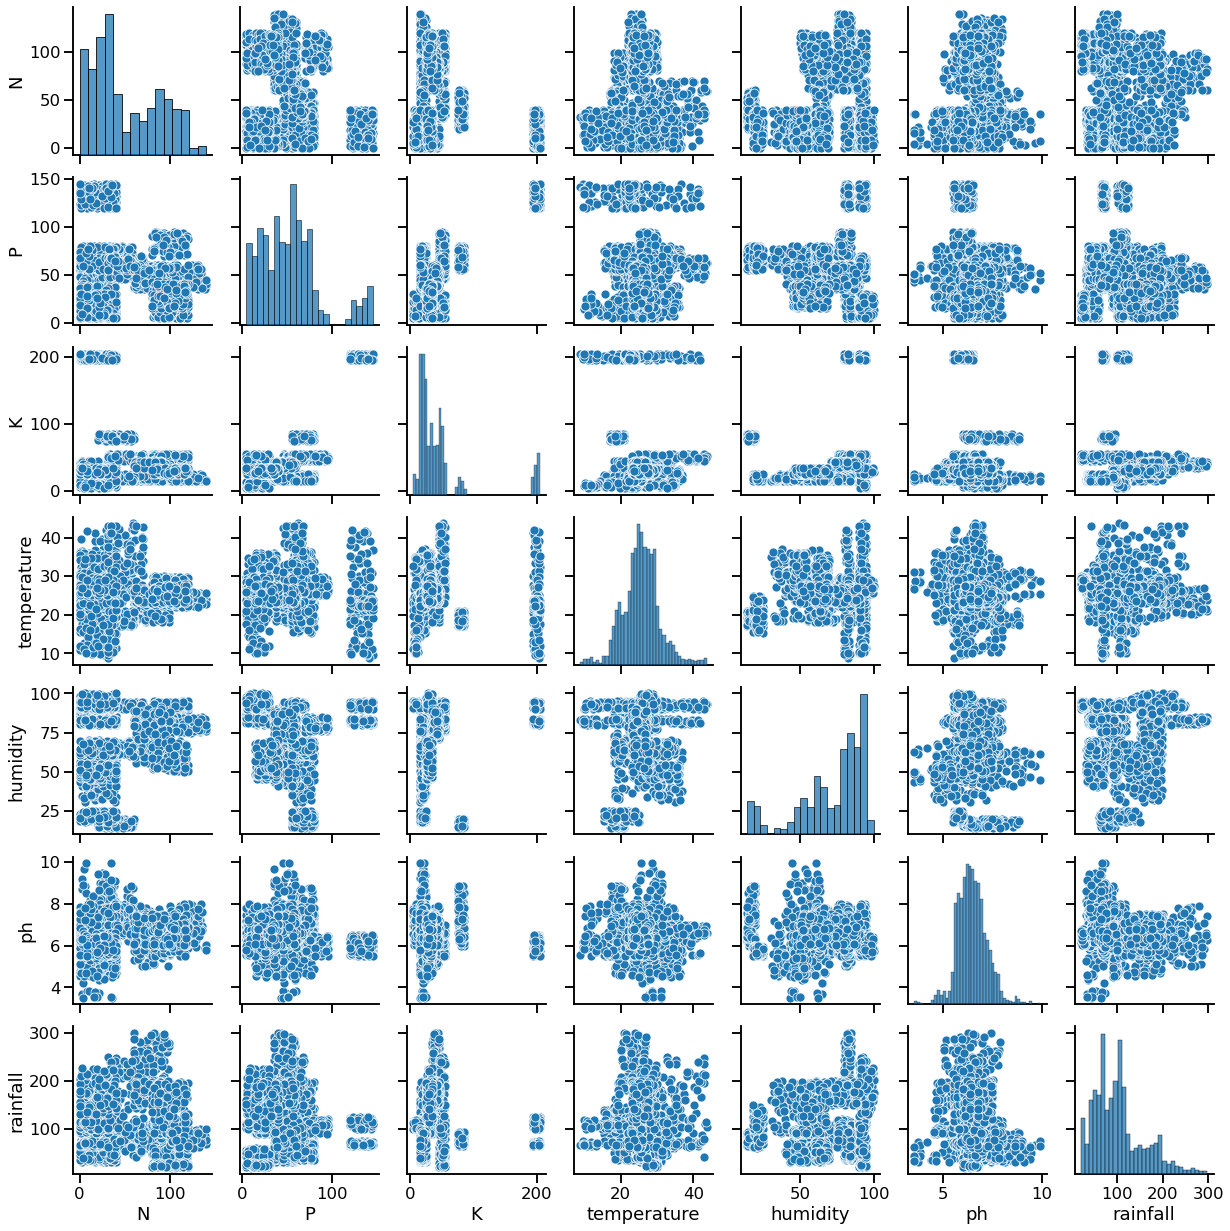

In [106]:
ax = sns.pairplot(crop_data)
ax;

In [107]:
crop_data.crop.unique()

array(['Berries nes', 'Wheat', 'Beans dry', 'pigeonpeas', 'mothbeans',
       'Peas green', 'Soyabeans', 'Beans green', 'pomegranate', 'Sorghum',
       'Potatoes', 'Oats', 'Sweet Potatoes', 'watermelon', 'muskmelon',
       'apple', 'orange', 'Tomatoes', 'Cassava', 'Barley', 'Rice'],
      dtype=object)

In [108]:
n = 5
crop_data['crop'].value_counts()[:5].index.tolist()

['Berries nes', 'Potatoes', 'Sorghum', 'Rice', 'apple']

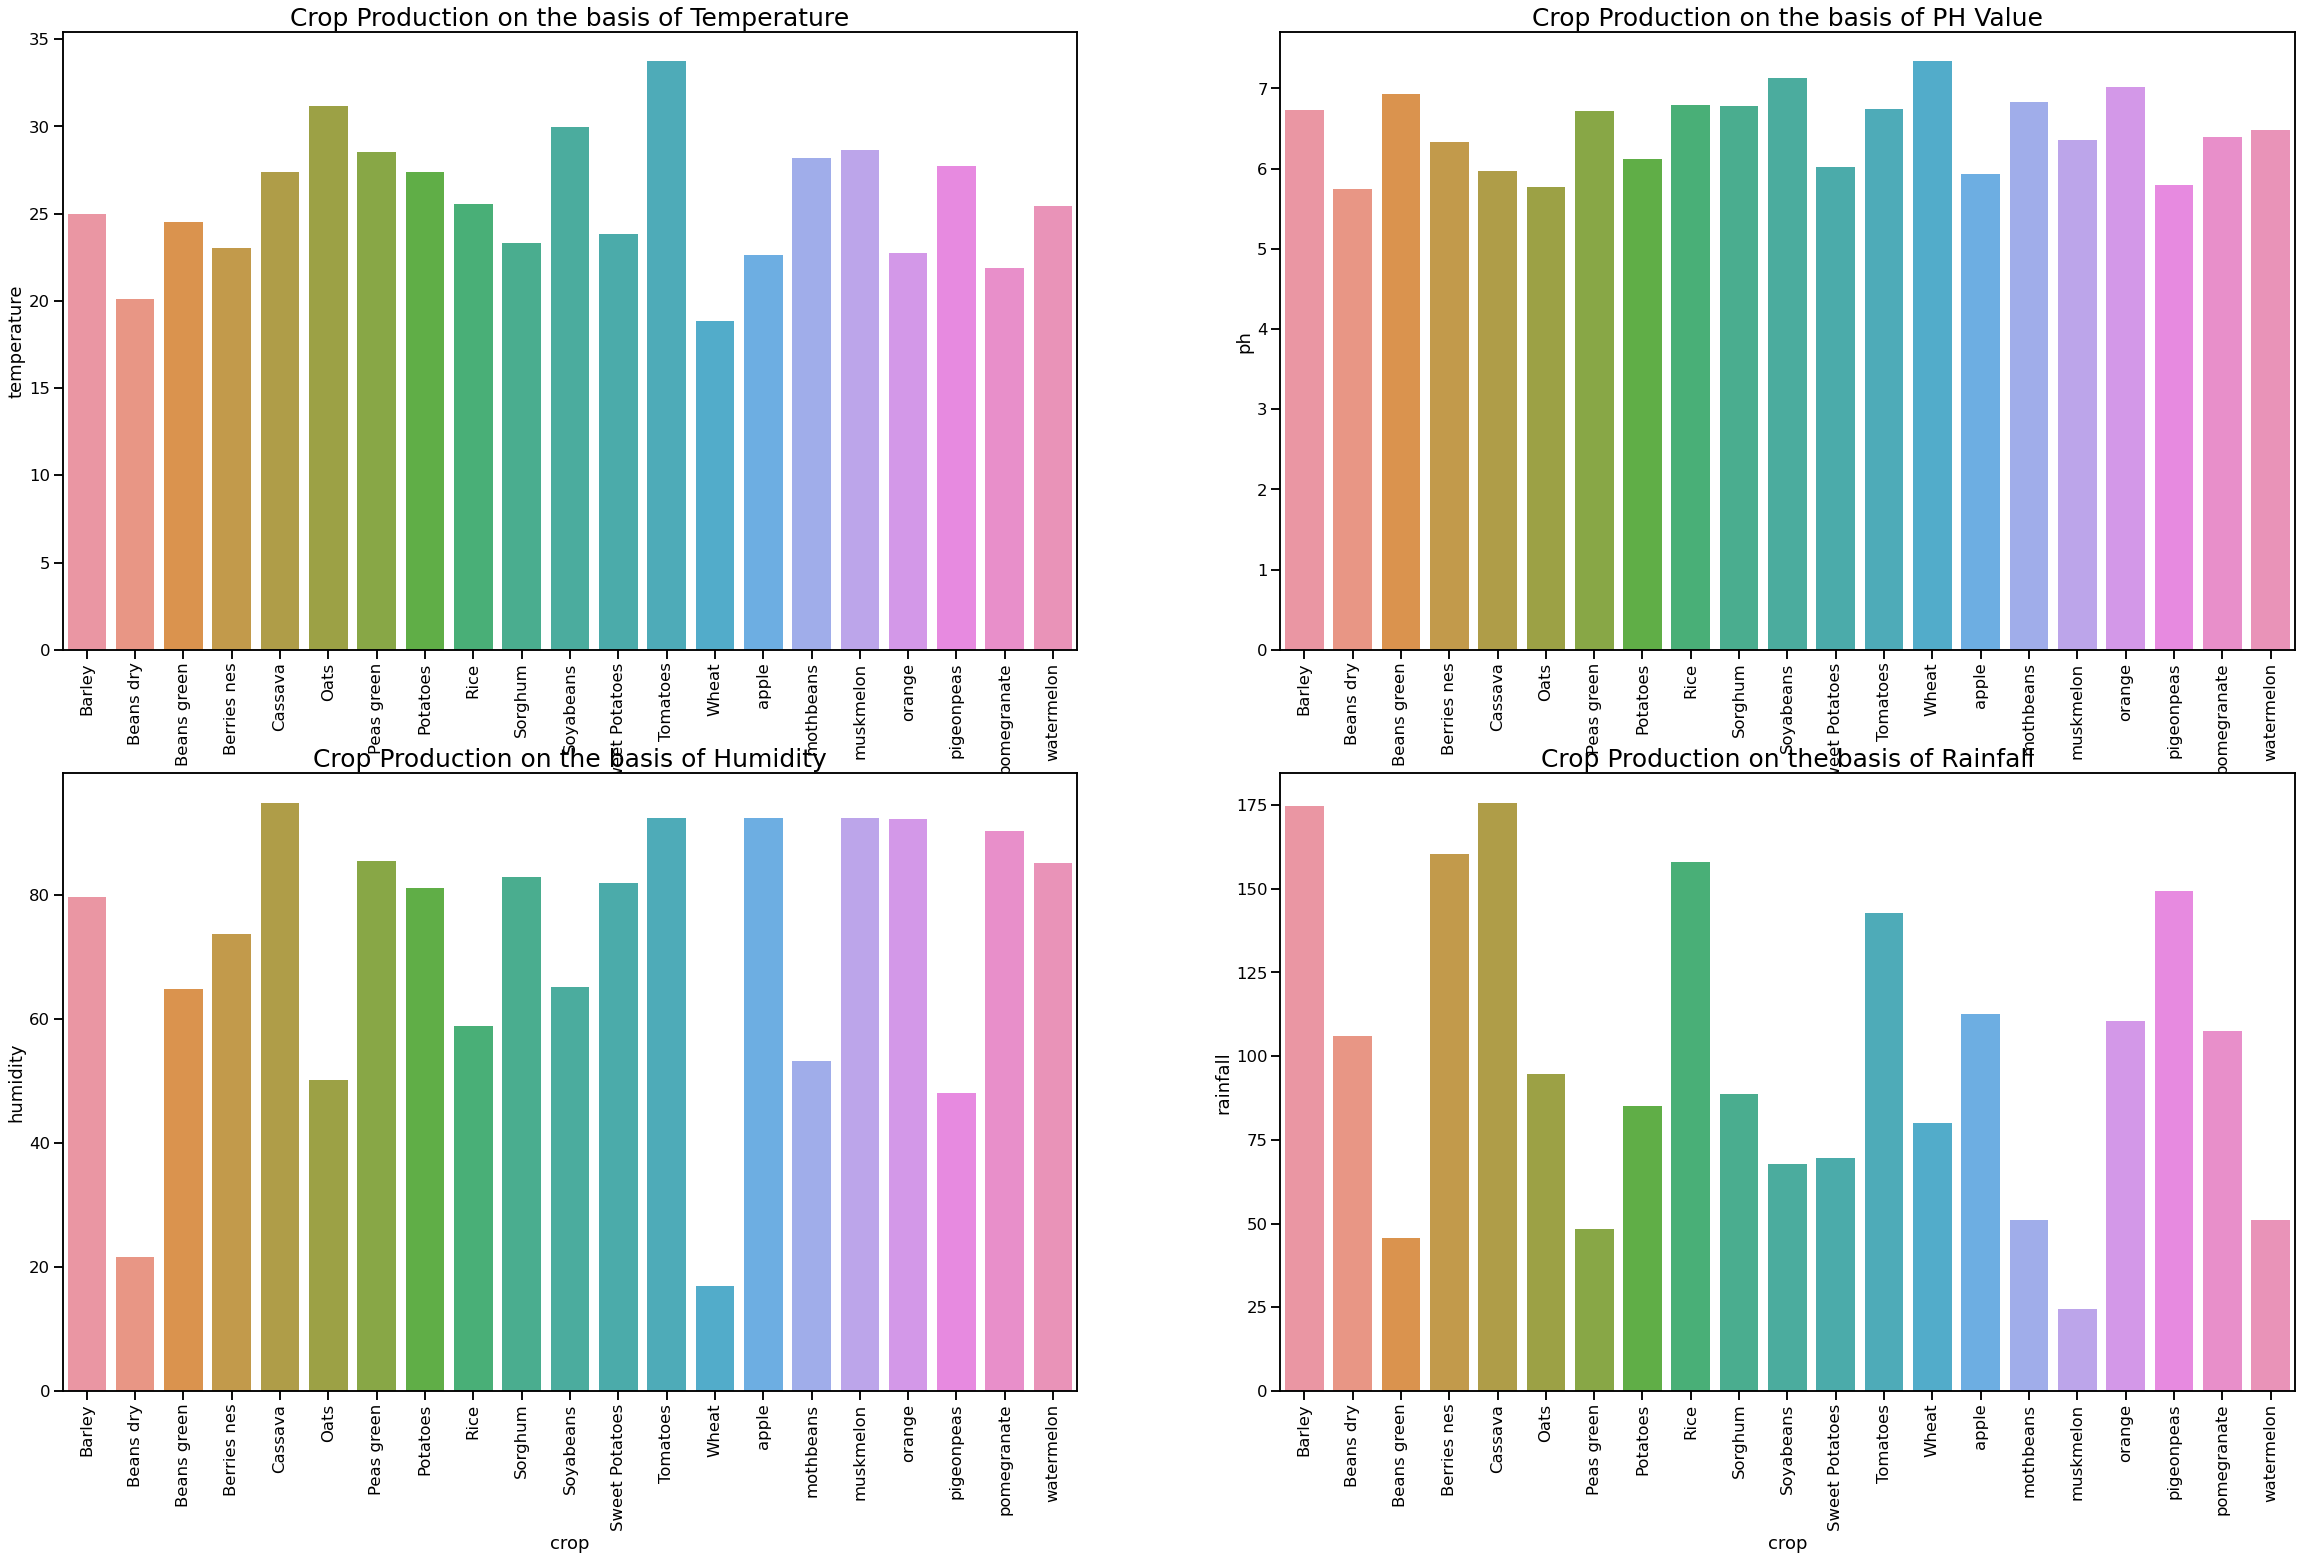

In [110]:
fig = plt.figure(figsize=[40,25])
ax1 = fig.add_subplot(2,2,1)
ax1 = sns.barplot(x='crop',y='temperature',data=crop_data.groupby('crop')['temperature'].mean().reset_index())
plt.xticks(rotation = 90);
plt.title("Crop Production on the basis of Temperature", fontsize = "25");

ax2 = fig.add_subplot(2,2,2)
ax2 = sns.barplot(x='crop',y='ph',data=crop_data.groupby('crop')['ph'].mean().reset_index())
plt.xticks(rotation = 90);
plt.title("Crop Production on the basis of PH Value", fontsize = "25");

ax3 = fig.add_subplot(2,2,3)
ax3 = sns.barplot(x='crop',y='humidity',data=crop_data.groupby('crop')['humidity'].mean().reset_index())
plt.xticks(rotation = 90);
plt.title("Crop Production on the basis of Humidity", fontsize = "25");

ax4 = fig.add_subplot(2,2,4)
ax4 = sns.barplot(x='crop',y='rainfall',data=crop_data.groupby('crop')['rainfall'].mean().reset_index())
plt.xticks(rotation = 90);
plt.title("Crop Production on the basis of Rainfall", fontsize = "25");

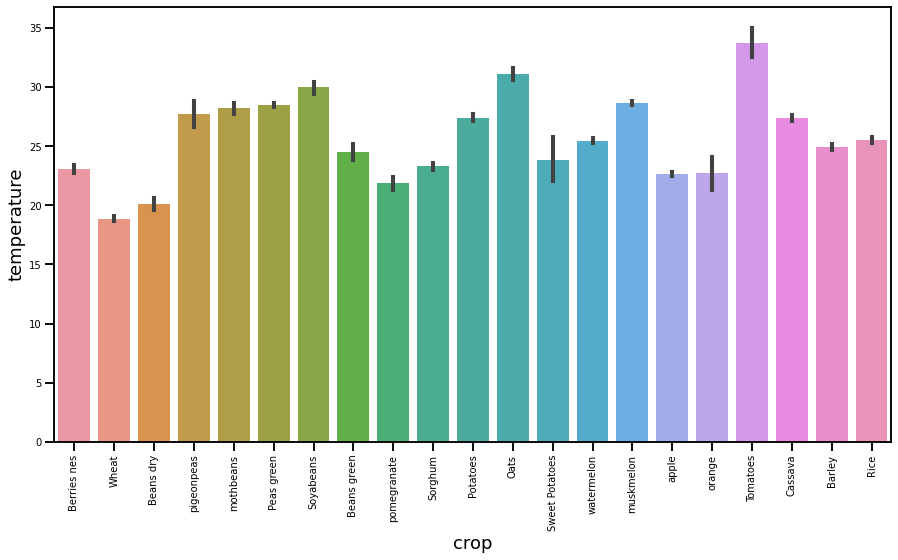

In [111]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
sns.barplot(crop_data["crop"], crop_data["temperature"])
plt.xticks(rotation = 90);
plt.show();

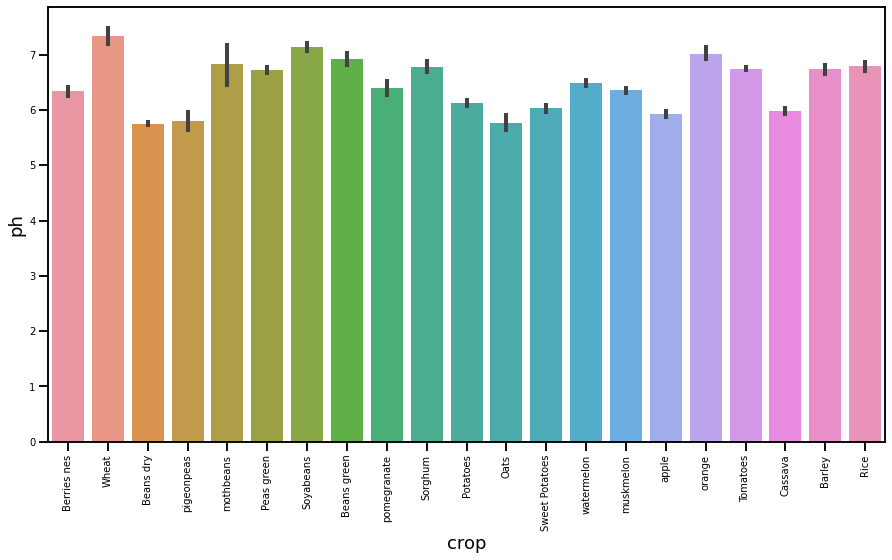

In [112]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
sns.barplot(crop_data["crop"], crop_data["ph"])
plt.xticks(rotation = 90);
plt.show();

In [113]:
crop_data.corr()

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Matrix')

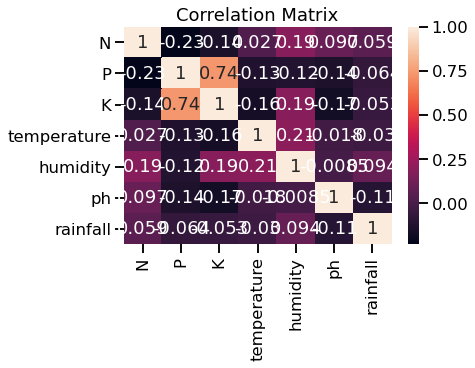

In [114]:
sns.heatmap(crop_data.corr(), annot =True)
plt.title('Correlation Matrix')

In [115]:
from sklearn.utils import shuffle

df  = shuffle(crop_data,random_state=5)
df.head()

N    P    K  temperature   humidity        ph    rainfall  \
1270   6  140  205    17.665584  82.929034  6.313086   69.867126   
1481  98   22   47    29.072653  91.915332  6.341401   28.835684   
1832  38   14   30    26.924495  91.201060  5.570745  194.902214   
293   35   63   76    17.815645  17.607566  7.714153   90.820976   
1307  85   22   53    25.965342  89.770767  6.849472   59.463386   

                crop  
1270  Sweet Potatoes  
1481       muskmelon  
1832         Cassava  
293            Wheat  
1307      watermelon

In [116]:
x = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['crop']

In [117]:
y = pd.get_dummies(target)
y

Barley  Beans dry  Beans green  Berries nes  Cassava  Oats  Peas green  \
1270       0          0            0            0        0     0           0   
1481       0          0            0            0        0     0           0   
1832       0          0            0            0        1     0           0   
293        0          0            0            0        0     0           0   
1307       0          0            0            0        0     0           0   
...      ...        ...          ...          ...      ...   ...         ...   
740        0          0            0            0        0     0           0   
1032       0          0            0            0        0     0           0   
2121       0          0            0            0        0     0           0   
1424       0          0            0            0        0     0           0   
1725       0          0            0            0        0     0           0   

      Potatoes  Rice  Sorghum  ...  Sweet Potatoes  Tomatoes  Wheat  apple  \
1270         0     0        0  ...               1         0      0      0   
1481         0     0        0  ...               0         0      0      0   
1832         0     0        0  ...               0         0      0      0   
293          0     0        0  ...               0         0      1      0   
1307         0     0        0  ...               0         0      0      0   
...        ...   ...      ...  ...             ...       ...    ...    ...   
740          0     0        0  ...               0         0      0      0   
1032         1     0        0  ...               0         0      0      0   
2121         0     1        0  ...               0         0      0      0   
1424         0     0        0  ...               0         0      0      0   
1725         0     0        0  ...               0         1      0      0   

      mothbeans  muskmelon  orange  pigeonpeas  pomegranate  watermelon  
1270          0          0       0           0            0           0  
1481          0          1       0           0            0           0  
1832          0          0       0           0            0           0  
293           0          0       0           0            0           0  
1307          0          0       0           0            0           1  
...         ...        ...     ...         ...          ...         ...  
740           0          0       0           0            0           0  
1032          0          0       0           0            0           0  
2121          0          0       0           0            0           0  
1424          0          1       0           0            0           0  
1725          0          0       0           0            0           0  

[2200 rows x 21 columns]

In [118]:
# Splitting data set - 25% test dataset and 75% 
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state= 0)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (1650, 7)
x_test : (550, 7)
y_train : (1650, 21)
y_test : (550, 21)


In [119]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [120]:
forest = RandomForestClassifier(random_state=5)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(x_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=5),
                      n_jobs=-1)

In [121]:
# Predicting test results 
forest_pred = multi_target_forest.predict(x_test)
forest_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [122]:
# Calculating Accuracy

from sklearn.metrics import accuracy_score
a1 = accuracy_score(y_test, forest_pred)
print('Accuracy score:', accuracy_score(y_test, forest_pred))

Accuracy score: 0.9309090909090909


In [123]:
#cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(multi_target_forest,X = x_train, y = y_train,cv=5)
score

array([0.92121212, 0.9030303 , 0.9030303 , 0.87272727, 0.89393939])

In [124]:
b1 = "{:.2f}".format(score.mean()*100)
b1 = float(b1)
b1

89.88

In [125]:
c1 = (score.std()*100)
c1

1.575757575757579

In [126]:
print("Accuracy : {:.2f}%".format (score.mean()*100))
print("Standard Deviation : {:.2f}%".format(score.std()*100))

Accuracy : 89.88%
Standard Deviation : 1.58%


In [127]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=6)
multi_target_decision = MultiOutputClassifier(clf, n_jobs=-1)
multi_target_decision.fit(x_train, y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(random_state=6),
                      n_jobs=-1)

In [128]:
# Predicting test results 

decision_pred = multi_target_decision.predict(x_test)
decision_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [129]:
# Calculating Accuracy

from sklearn.metrics import accuracy_score
a2 = accuracy_score(y_test,decision_pred)
print('Accuracy score:', accuracy_score(y_test,decision_pred))
a2

Accuracy score: 0.8727272727272727


0.8727272727272727

In [130]:
#cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(multi_target_decision,X = x_train, y = y_train,cv=7)
score

array([0.80932203, 0.82627119, 0.80508475, 0.86864407, 0.86440678,
       0.88085106, 0.82978723])

In [131]:
b2 = "{:.2f}".format(score.mean()*100)
b2 = float(b2)
b2

84.06

In [132]:
c2 = (score.std()*100)
c2

2.812028220505493

In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf=KNeighborsClassifier()
model = MultiOutputClassifier(knn_clf, n_jobs=-1)
model.fit(x_train, y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(), n_jobs=-1)

In [134]:
knn_pred = model.predict(x_test)
knn_pred

array([[0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [135]:
# Calculating Accuracy

from sklearn.metrics import accuracy_score
a3 = accuracy_score(y_test,knn_pred)
print('Accuracy score:', accuracy_score(y_test,knn_pred))

Accuracy score: 0.9290909090909091


In [136]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,X = x_train, y = y_train,cv=7)
score

array([0.94067797, 0.90677966, 0.91525424, 0.9279661 , 0.94491525,
       0.92765957, 0.93617021])

In [137]:
b3 = "{:.2f}".format(score.mean()*100)
b3 = float(b3)
b3

92.85

In [138]:
c3 = (score.std()*100)
c3

1.267624023192893

In [139]:
import pandas as pd
 
# initialise data of lists.
data = {'Algorithms':['Random Forest', 'Decision-tree', 'KNN Classifier'],
        'Accuracy':[b1, b2, b3],
        'Standard Deviation':[c1,c2,c3]}
 
# Creates pandas DataFrame.
df = pd.DataFrame(data)
 
# print the data
df

Algorithms  Accuracy  Standard Deviation
0   Random Forest     89.88            1.575758
1   Decision-tree     84.06            2.812028
2  KNN Classifier     92.85            1.267624

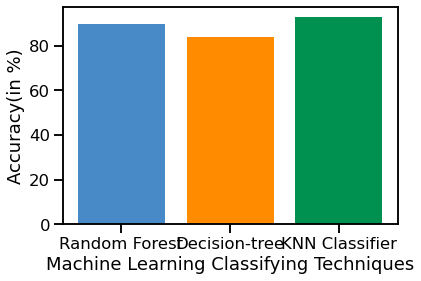

In [140]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree','KNN Classifier']
Accuracy = [b1, b2, b3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00','#009150'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Classifying Techniques')

# Show graph
plt.show();

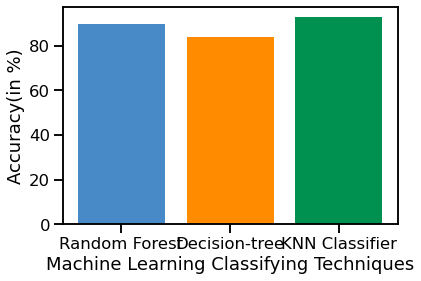

In [141]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree','KNN Classifier']
Accuracy = [b1, b2, b3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00','#009150'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Classifying Techniques')

# Show graph
plt.show();

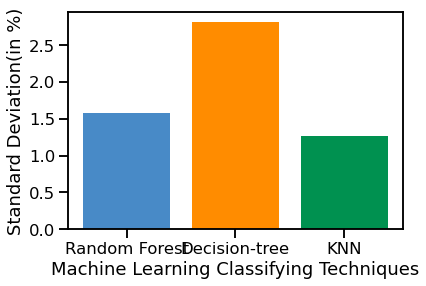

In [142]:
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree','KNN']
Accuracy = [c1, c2, c3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color= ['#488AC7','#ff8c00','#009150'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Classifying Techniques')

# Show graph
plt.show();

<BarContainer object of 3 artists>

Text(0.5, 0, 'Machine Learning Classifying Algorithms')

Text(0, 0.5, 'Accuracy (in %)')

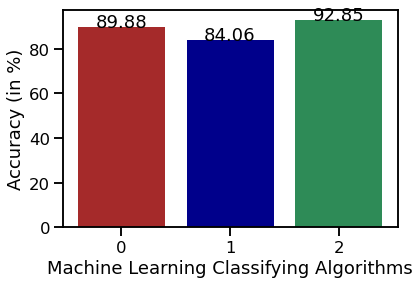

In [143]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i],ha = 'center')
  
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = ["Random Forest", "Decision tree", "KNN"]
    y = [b1,b2,b3]


    x_pos = np.arange(len(y))

    # Create bars with different colors
    plt.bar(x_pos, y, color= ['#A52A2A','#00008B','#2E8B57'])
      
    # calling the function to add value labels
    addlabels(x, y)
      
    # giving X and Y labels
    plt.xlabel("Machine Learning Classifying Algorithms")
    plt.ylabel("Accuracy (in %)")
      
    # visualizing the plot
    plt.show();

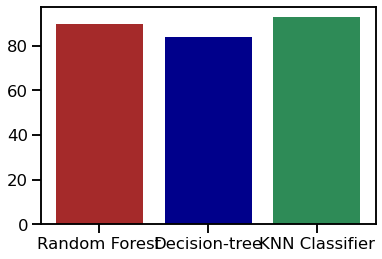

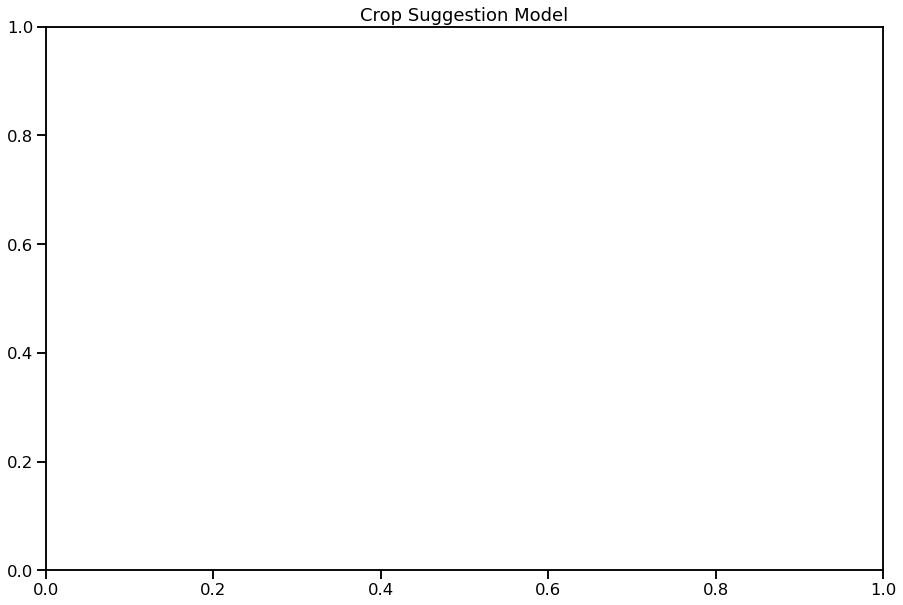

In [144]:
plt.bar(df['Algorithms'], df['Accuracy'], color = ['#A52A2A','#00008B','#2E8B57'])
fig = plt.figure(figsize =(15, 10))
plt.title('Crop Suggestion Model')
 
# Show Plot
plt.show();

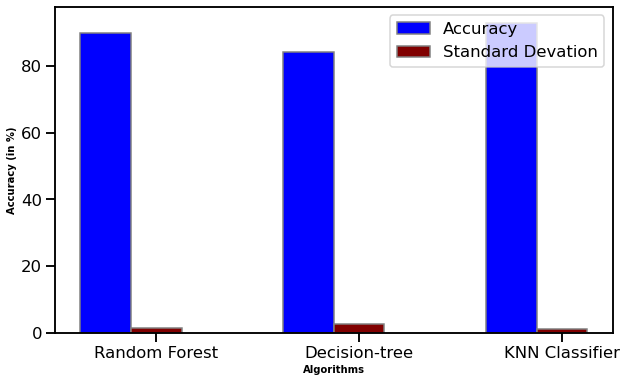

In [145]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 6))
 
# set height of bar
Algorithms = ['Random Forest', 'Decision-tree', 'KNN Classifier']
Accuracy = [b1, b2, b3]
Standard_Deviation = [c1,c2,c3]
 
# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, Accuracy, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Standard_Deviation, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Standard Devation')
 
# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy (in %)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        Algorithms)
 
plt.legend()
plt.show();

In [146]:
# Saving the trained Random Forest model
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open('pickle.pkl', 'wb')
pickle.dump(multi_target_forest, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

In [147]:
#SENTIMENT ANALYSIS

import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [148]:
df = pd.read_csv("tweets.csv")

In [149]:
df.head(5)

Unnamed: 0                                               text  \
0           0  RT @eu_eeas: Russiaâ€™s illegal invasion of Uk...   
1           1  RT @MiriamGarciaFr: ðŸ‡ªðŸ‡º providing further...   
2           2  RT @EU_Commission: Farmers are being hit by th...   
3           3  @TinoushJ Hi @TinoushJ, thank you for your fee...   
4           4  RT @eurireland: The @EU_Commission has propose...   

   favorite_count  retweet_count                 created_at  Target  
0             0.0            127  2022-05-20 13:23:27+00:00     1.0  
1             0.0              4  2022-05-20 13:21:53+00:00     2.0  
2             0.0             52  2022-05-20 13:21:25+00:00     1.0  
3             0.0              0  2022-05-20 12:56:26+00:00     0.0  
4             0.0             12  2022-05-20 11:06:58+00:00     2.0

In [150]:
print('length of data is', len(df))

length of data is 500


In [151]:
df.shape

(500, 6)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      500 non-null    int64  
 1   text            500 non-null    object 
 2   favorite_count  499 non-null    float64
 3   retweet_count   500 non-null    int64  
 4   created_at      498 non-null    object 
 5   Target          497 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 23.6+ KB


In [153]:
df.dtypes

Unnamed: 0          int64
text               object
favorite_count    float64
retweet_count       int64
created_at         object
Target            float64
dtype: object

In [154]:
print(df.isnull().sum()) 

Unnamed: 0        0
text              0
favorite_count    1
retweet_count     0
created_at        2
Target            3
dtype: int64


In [155]:
df = df.dropna()

In [156]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   494


In [157]:
df['Target'].unique()

array([1., 2., 0.])

In [158]:
df['Target'].nunique()

3

[Text(0, 0, 'Neutral'), Text(1, 0, 'Negative'), Text(2, 0, 'Positive')]

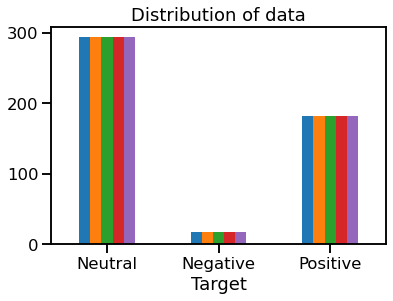

In [159]:
# Plotting the distribution for dataset.
ax = df.groupby('Target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Neutral','Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['Target'])

<AxesSubplot:xlabel='Target', ylabel='count'>

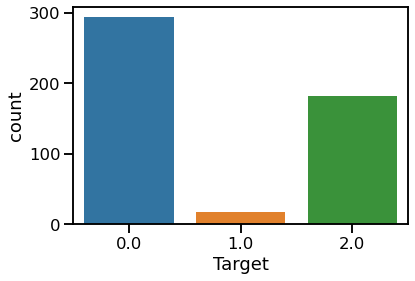

In [160]:
import seaborn as sns
sns.countplot(x='Target', data=df)

In [161]:
data=df[['text','Target']]

In [162]:
data_pos = data[data['Target'] == 1]
data_neg = data[data['Target'] == 2]

In [163]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

In [164]:
dataset = pd.concat([data_pos, data_neg])

In [165]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

488    today we register the 2nd african geographical...
489    new study measuring the impact of #leader, the...
493    rt @jwojc: today at 11 am i will participate i...
494    rt @enrique_jna: ðÿ“œnew podcast from @euagri!...
498    rt @elisaferreiraec: 137 million people\n30% ð...
Name: text, dtype: object

In [166]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [167]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0     rt @eu_eeas: russiaâ€™s illegal invasion ukrai...
2     rt @eu_commission: farmers hit consequences ru...
48    rt @eu_commission: don't afraid. don't afraid ...
57    rt @ecfin: russiaâ€™s war against ukraine test...
75    rt @eu_growth: need move goods in/out ukraine!...
Name: text, dtype: object

In [168]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

488    today register 2nd african geographical indica...
489    new study measuring impact leader eu community...
493    rt jwojc today 11 participate comagri meeting ...
494    rt enriquejna ðÿ“œnew podcast euagri time long...
498    rt elisaferreiraec 137 million people 30 ðÿ‡ªð...
Name: text, dtype: object

In [169]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

488    today register 2nd african geographical indica...
489    new study measuring impact leader eu community...
493    rt jwojc today1 participate comagri meeting di...
494    rt enriquejna ðÿ“œnew podcast euagri time long...
498    rt elisaferreiraec137 million people 30 ðÿ‡ªðÿ...
Name: text, dtype: object

In [170]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

488    today register 2nd african geographical indica...
489    new study measuring impact leader eu community...
493    rt jwojc today1 participate comagri meeting di...
494    rt enriquejna ðÿ“œnew podcast euagri time long...
498    rt elisaferreiraec137 million people 30 ðÿ‡ªðÿ...
Name: text, dtype: object

In [171]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

488    today register nd african geographical indicat...
489    new study measuring impact leader eu community...
493    rt jwojc today participate comagri meeting dis...
494    rt enriquejna ðÿ“œnew podcast euagri time long...
498    rt elisaferreiraec million people  ðÿ‡ªðÿ‡º po...
Name: text, dtype: object

In [172]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

0         []
2         []
48       [w]
57       [w]
75    [w, w]
Name: text, dtype: object

In [173]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

0         []
2         []
48       [w]
57       [w]
75    [w, w]
Name: text, dtype: object

In [174]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [175]:
#nltk.download()

In [176]:
#lm = nltk.WordNetLemmatizer()
#def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
#dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
#dataset['text'].head()

IndentationError: unexpected indent (<ipython-input-176-3e168870ef47>, line 3)

In [177]:
X=data.text
y=data.Target

<Figure size 1440x1440 with 0 Axes>

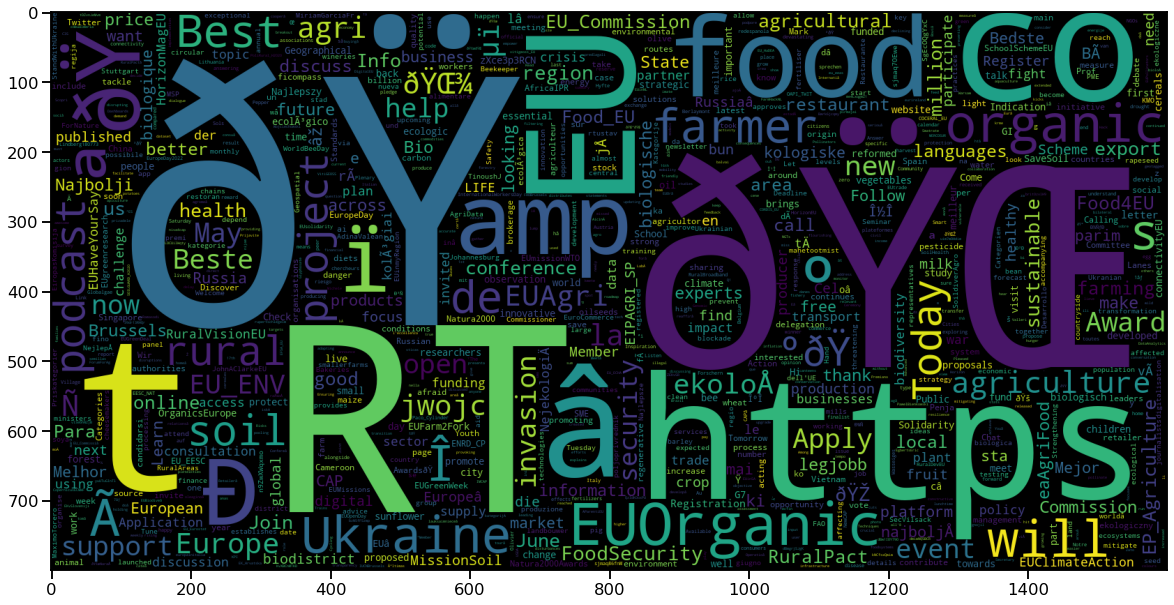

In [178]:
data_neg = data['text'][:250]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

<Figure size 1440x1440 with 0 Axes>

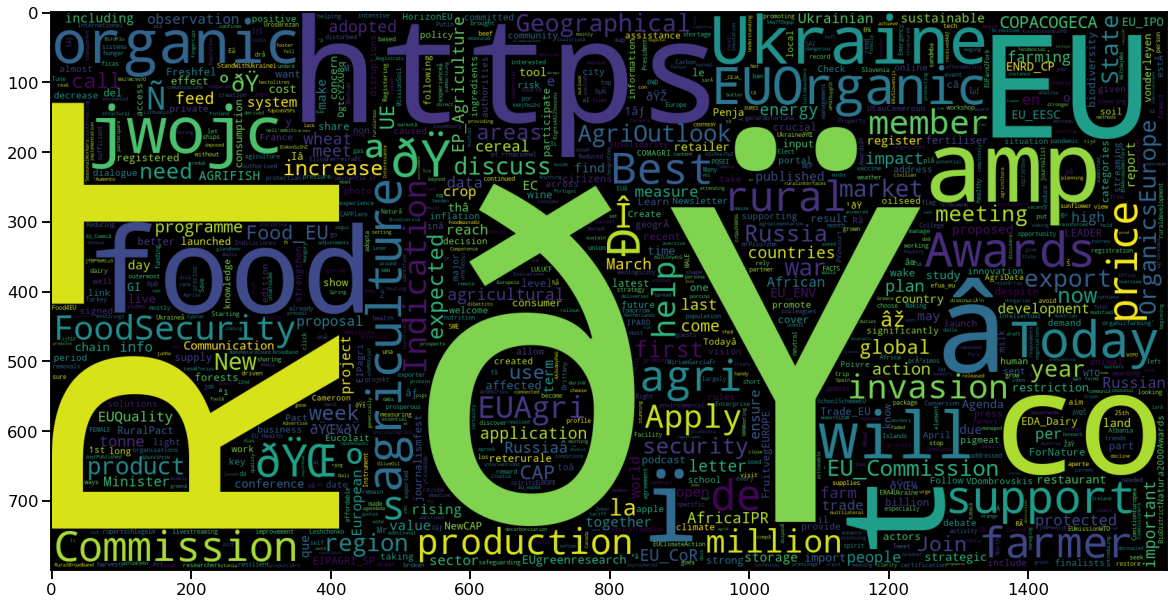

In [179]:
data_pos = data['text'][250:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [181]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

No. of feature_words:  11505


In [182]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [183]:
def model_Evaluate(model):
# Predict values for Test dataset
    y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

BernoulliNB()

              precision    recall  f1-score   support

         0.0       0.57      0.92      0.71        13
         2.0       0.75      0.25      0.38        12

    accuracy                           0.60        25
   macro avg       0.66      0.59      0.54        25
weighted avg       0.66      0.60      0.55        25



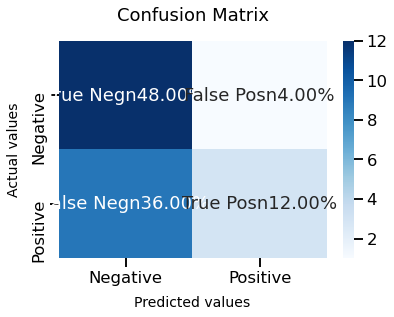

In [184]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

LogisticRegression(C=2, max_iter=1000, n_jobs=-1)

              precision    recall  f1-score   support

         0.0       0.56      0.69      0.62        13
         2.0       0.56      0.42      0.48        12

    accuracy                           0.56        25
   macro avg       0.56      0.55      0.55        25
weighted avg       0.56      0.56      0.55        25



(array([0.5, 1.5]), [Text(0.5, 0, 'Negative'), Text(1.5, 0, 'Positive')])

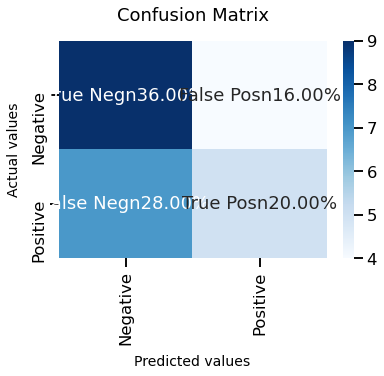

In [191]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

LinearSVC()

              precision    recall  f1-score   support

         0.0       0.82      0.69      0.75        13
         2.0       0.71      0.83      0.77        12

    accuracy                           0.76        25
   macro avg       0.77      0.76      0.76        25
weighted avg       0.77      0.76      0.76        25



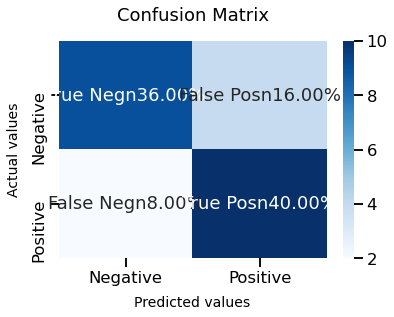

In [189]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)